# Hyperparameters

### Scope
In this notebook, we examine the effect of MLP activation functions and other hyperparameters

In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from train import train_model
from models import LightGCNPlus
from config import DEVICE
from train import train_model
from postprocess import report_training_results
from itertools import product

In [2]:
from load import load_train_data
train_df = load_train_data()

In [3]:
from preprocess import preprocess

A_tilde, \
train_users, train_items, train_ratings, \
val_users, val_items, val_ratings \
= preprocess(train_df)

In [9]:
# Train loop hyperparameters
EPOCHS = 1000
STOP_THRESHOLD=1e-09

# Initial hyperparameters
INIT_EMBS_STD = 0.075
LR = 0.1
WEIGHT_DECAY = 0.00005
DROPOUT = 0.5
ACT_FN = nn.GELU()

# Fixed values for K, L, and PROJECTIONS
K = 28
L = 3
PROJECTIONS = (4,)

# Hyperparameter values to be searched
init_embs_stds = [0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.1]      # 10 values for INIT_EMBS_STD
lrs = [0.01, 0.03, 0.05, 0.07, 0.1, 0.13, 0.15, 0.17, 0.2, 0.25]                      # 10 values for LR
weight_decays = [0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.00004, 0.00005, 0.00006, 0.00007, 0.0001] # 10 values for WEIGHT_DECAY
dropouts = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]                        # 10 values for DROPOUT
activation_functions = [nn.GELU(), nn.ReLU(), nn.LeakyReLU(), nn.ELU(), nn.Sigmoid(), nn.Tanh(), nn.Softplus(), nn.Softsign(), nn.SELU(), nn.CELU()] # 10 values for ACT_FN

In [12]:
# Tuning LightGCNPlus
results = {
    "min_val_losses": [],
    "params": []
}


Testing INIT_EMBS_STD=0.05
Epoch 100 - Best Val: 0.9931 at 101 - mv-avg: - Train: 1.4273 - Val: 1.3045
Epoch 200 - Best Val: 0.9903 at 199 - mv-avg: - Train: 1.0161 - Val: 0.9924
Epoch 300 - Best Val: 0.9866 at 301 - mv-avg: - Train: 0.9955 - Val: 0.9882
Epoch 400 - Best Val: 0.9856 at 401 - mv-avg: - Train: 0.9860 - Val: 0.9864
Epoch 500 - Best Val: 0.9848 at 487 - mv-avg: - Train: 0.9797 - Val: 0.9857
Epoch 600 - Best Val: 0.9839 at 560 - mv-avg: - Train: 0.9757 - Val: 0.9849
Epoch 700 - Best Val: 0.9835 at 624 - mv-avg: - Train: 0.9729 - Val: 0.9845
Epoch 800 - Best Val: 0.9831 at 770 - mv-avg: - Train: 0.9710 - Val: 0.9842
Epoch 900 - Best Val: 0.9831 at 770 - mv-avg: - Train: 0.9698 - Val: 0.9841
Best val loss: 0.9831 at epoch 770


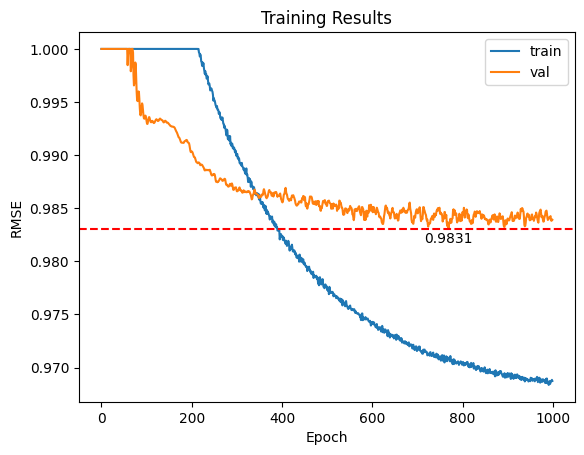

Testing INIT_EMBS_STD=0.055
Epoch 100 - Best Val: 0.9905 at 88 - mv-avg: - Train: 1.3452 - Val: 1.1853
Epoch 200 - Best Val: 0.9825 at 201 - mv-avg: - Train: 1.0222 - Val: 0.9861
Epoch 300 - Best Val: 0.9799 at 277 - mv-avg: - Train: 0.9964 - Val: 0.9814
Epoch 400 - Best Val: 0.9791 at 373 - mv-avg: - Train: 0.9838 - Val: 0.9798
Epoch 500 - Best Val: 0.9783 at 490 - mv-avg: - Train: 0.9750 - Val: 0.9790
Epoch 600 - Best Val: 0.9780 at 518 - mv-avg: - Train: 0.9693 - Val: 0.9789
Epoch 700 - Best Val: 0.9779 at 619 - mv-avg: - Train: 0.9663 - Val: 0.9788
Epoch 800 - Best Val: 0.9773 at 747 - mv-avg: - Train: 0.9646 - Val: 0.9784
Epoch 900 - Best Val: 0.9773 at 747 - mv-avg: - Train: 0.9631 - Val: 0.9782
Best val loss: 0.9767 at epoch 975


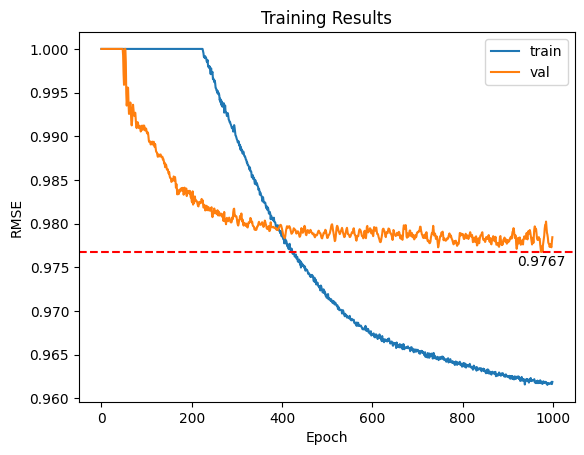

Testing INIT_EMBS_STD=0.06
Epoch 100 - Best Val: 0.9880 at 99 - mv-avg: - Train: 1.2861 - Val: 1.1853
Epoch 200 - Best Val: 0.9847 at 199 - mv-avg: - Train: 1.0136 - Val: 0.9866
Epoch 300 - Best Val: 0.9824 at 263 - mv-avg: - Train: 0.9923 - Val: 0.9833
Epoch 400 - Best Val: 0.9814 at 378 - mv-avg: - Train: 0.9813 - Val: 0.9823
Epoch 500 - Best Val: 0.9794 at 494 - mv-avg: - Train: 0.9740 - Val: 0.9807
Epoch 600 - Best Val: 0.9780 at 564 - mv-avg: - Train: 0.9687 - Val: 0.9790
Epoch 700 - Best Val: 0.9774 at 672 - mv-avg: - Train: 0.9649 - Val: 0.9783
Epoch 800 - Best Val: 0.9774 at 672 - mv-avg: - Train: 0.9625 - Val: 0.9782
Epoch 900 - Best Val: 0.9772 at 886 - mv-avg: - Train: 0.9615 - Val: 0.9782
Best val loss: 0.9768 at epoch 987


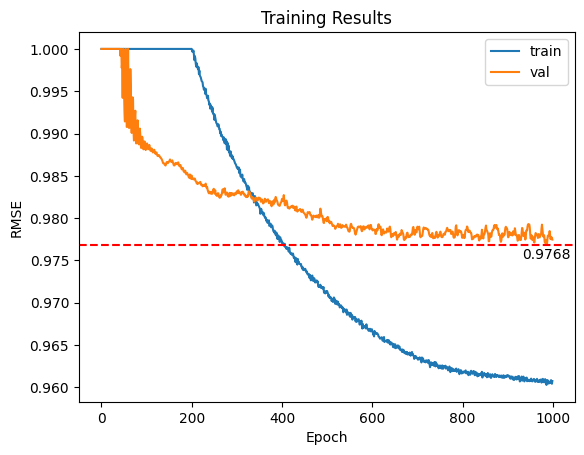

Testing INIT_EMBS_STD=0.065
Epoch 100 - Best Val: 0.9895 at 101 - mv-avg: - Train: 1.2500 - Val: 1.1539
Epoch 200 - Best Val: 0.9843 at 199 - mv-avg: - Train: 1.0062 - Val: 0.9871
Epoch 300 - Best Val: 0.9813 at 301 - mv-avg: - Train: 0.9855 - Val: 0.9828
Epoch 400 - Best Val: 0.9807 at 354 - mv-avg: - Train: 0.9731 - Val: 0.9816
Epoch 500 - Best Val: 0.9800 at 466 - mv-avg: - Train: 0.9665 - Val: 0.9811
Epoch 600 - Best Val: 0.9799 at 504 - mv-avg: - Train: 0.9620 - Val: 0.9812
Epoch 700 - Best Val: 0.9799 at 504 - mv-avg: - Train: 0.9597 - Val: 0.9824
Epoch 800 - Best Val: 0.9799 at 504 - mv-avg: - Train: 0.9585 - Val: 0.9829
Epoch 900 - Best Val: 0.9799 at 504 - mv-avg: - Train: 0.9578 - Val: 0.9833
Best val loss: 0.9799 at epoch 504


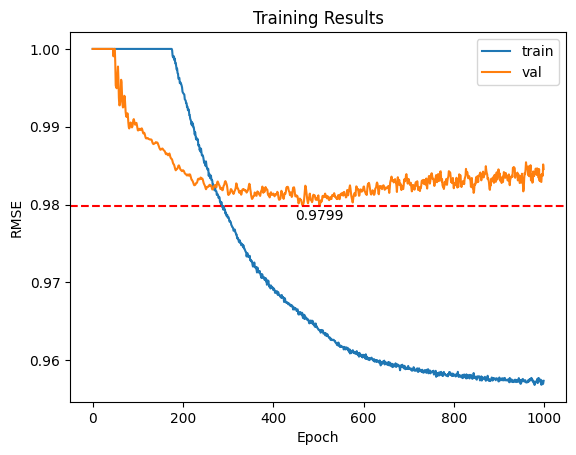

Testing INIT_EMBS_STD=0.07
Epoch 100 - Best Val: 0.9979 at 99 - mv-avg: - Train: 1.5620 - Val: 1.3866
Epoch 200 - Best Val: 0.9933 at 192 - mv-avg: - Train: 1.0446 - Val: 0.9955
Epoch 300 - Best Val: 0.9897 at 285 - mv-avg: - Train: 1.0059 - Val: 0.9914
Epoch 400 - Best Val: 0.9868 at 390 - mv-avg: - Train: 0.9877 - Val: 0.9884
Epoch 500 - Best Val: 0.9836 at 500 - mv-avg: - Train: 0.9767 - Val: 0.9851
Epoch 600 - Best Val: 0.9828 at 598 - mv-avg: - Train: 0.9709 - Val: 0.9835
Epoch 700 - Best Val: 0.9823 at 668 - mv-avg: - Train: 0.9681 - Val: 0.9828
Epoch 800 - Best Val: 0.9818 at 786 - mv-avg: - Train: 0.9663 - Val: 0.9825
Epoch 900 - Best Val: 0.9817 at 841 - mv-avg: - Train: 0.9649 - Val: 0.9821
Best val loss: 0.9813 at epoch 978


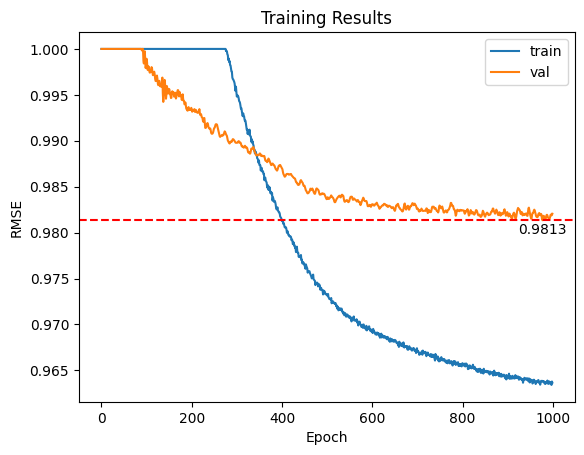

Testing INIT_EMBS_STD=0.075
Epoch 100 - Best Val: 0.9903 at 99 - mv-avg: - Train: 1.2341 - Val: 1.1403
Epoch 200 - Best Val: 0.9856 at 188 - mv-avg: - Train: 1.0029 - Val: 0.9882
Epoch 300 - Best Val: 0.9824 at 299 - mv-avg: - Train: 0.9838 - Val: 0.9841
Epoch 400 - Best Val: 0.9815 at 346 - mv-avg: - Train: 0.9717 - Val: 0.9829
Epoch 500 - Best Val: 0.9815 at 346 - mv-avg: - Train: 0.9633 - Val: 0.9835
Epoch 600 - Best Val: 0.9815 at 525 - mv-avg: - Train: 0.9578 - Val: 0.9830
Epoch 700 - Best Val: 0.9810 at 689 - mv-avg: - Train: 0.9547 - Val: 0.9824
Epoch 800 - Best Val: 0.9810 at 689 - mv-avg: - Train: 0.9529 - Val: 0.9825
Epoch 900 - Best Val: 0.9809 at 839 - mv-avg: - Train: 0.9518 - Val: 0.9825
Best val loss: 0.9809 at epoch 839


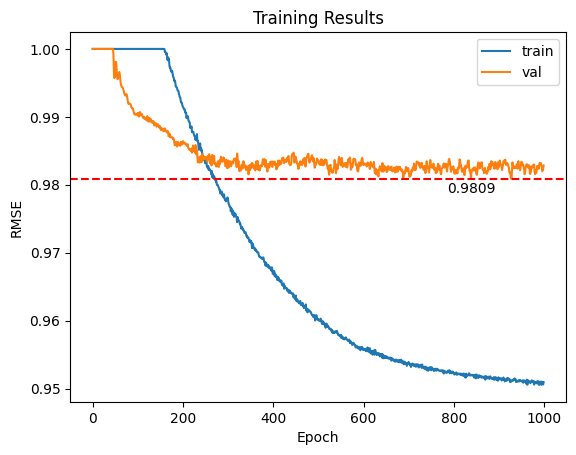

Testing INIT_EMBS_STD=0.08
Epoch 100 - Best Val: 0.9887 at 100 - mv-avg: - Train: 1.3902 - Val: 1.2718
Epoch 200 - Best Val: 0.9818 at 201 - mv-avg: - Train: 1.0203 - Val: 0.9853
Epoch 300 - Best Val: 0.9790 at 289 - mv-avg: - Train: 0.9964 - Val: 0.9805
Epoch 400 - Best Val: 0.9774 at 394 - mv-avg: - Train: 0.9848 - Val: 0.9787
Epoch 500 - Best Val: 0.9774 at 394 - mv-avg: - Train: 0.9781 - Val: 0.9781
Epoch 600 - Best Val: 0.9768 at 503 - mv-avg: - Train: 0.9731 - Val: 0.9778
Epoch 700 - Best Val: 0.9768 at 503 - mv-avg: - Train: 0.9690 - Val: 0.9781
Epoch 800 - Best Val: 0.9768 at 503 - mv-avg: - Train: 0.9661 - Val: 0.9787
Epoch 900 - Best Val: 0.9768 at 503 - mv-avg: - Train: 0.9643 - Val: 0.9792
Best val loss: 0.9768 at epoch 503


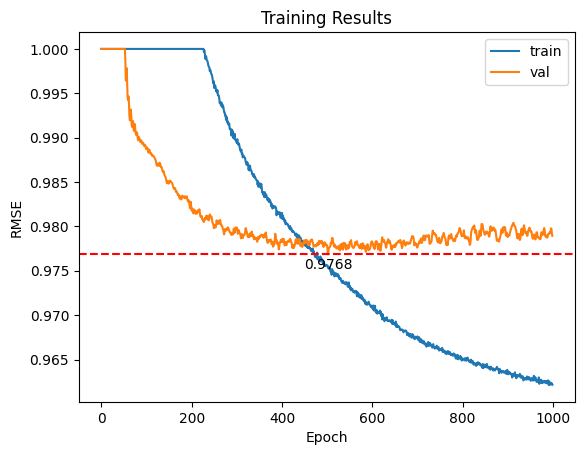

Testing INIT_EMBS_STD=0.085
Epoch 100 - Best Val: 0.9935 at 76 - mv-avg: - Train: 1.2664 - Val: 1.1578
Epoch 200 - Best Val: 0.9935 at 76 - mv-avg: - Train: 1.0087 - Val: 0.9946
Epoch 300 - Best Val: 0.9925 at 288 - mv-avg: - Train: 0.9963 - Val: 0.9935
Epoch 400 - Best Val: 0.9871 at 400 - mv-avg: - Train: 0.9876 - Val: 0.9908
Epoch 500 - Best Val: 0.9845 at 486 - mv-avg: - Train: 0.9796 - Val: 0.9862
Epoch 600 - Best Val: 0.9831 at 601 - mv-avg: - Train: 0.9738 - Val: 0.9840
Epoch 700 - Best Val: 0.9819 at 696 - mv-avg: - Train: 0.9695 - Val: 0.9832
Epoch 800 - Best Val: 0.9819 at 696 - mv-avg: - Train: 0.9656 - Val: 0.9832
Epoch 900 - Best Val: 0.9814 at 859 - mv-avg: - Train: 0.9630 - Val: 0.9827
Best val loss: 0.9798 at epoch 974


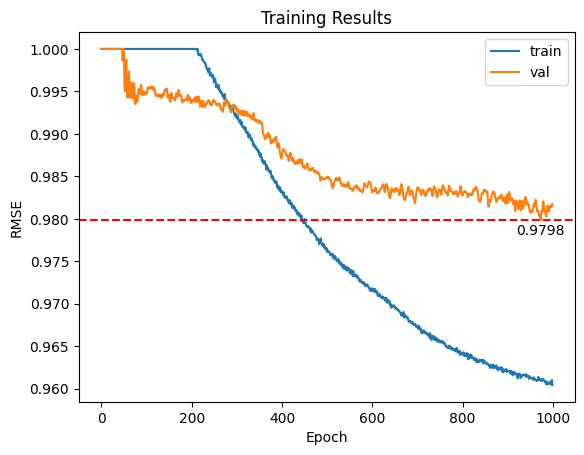

Testing INIT_EMBS_STD=0.09
Epoch 100 - Best Val: 0.9907 at 101 - mv-avg: - Train: 1.2377 - Val: 1.1281
Epoch 200 - Best Val: 0.9837 at 201 - mv-avg: - Train: 1.0171 - Val: 0.9870
Epoch 300 - Best Val: 0.9811 at 290 - mv-avg: - Train: 0.9895 - Val: 0.9826
Epoch 400 - Best Val: 0.9797 at 392 - mv-avg: - Train: 0.9752 - Val: 0.9810
Epoch 500 - Best Val: 0.9796 at 476 - mv-avg: - Train: 0.9678 - Val: 0.9804
Epoch 600 - Best Val: 0.9785 at 591 - mv-avg: - Train: 0.9639 - Val: 0.9800
Epoch 700 - Best Val: 0.9785 at 591 - mv-avg: - Train: 0.9612 - Val: 0.9800
Epoch 800 - Best Val: 0.9784 at 753 - mv-avg: - Train: 0.9590 - Val: 0.9797
Epoch 900 - Best Val: 0.9784 at 753 - mv-avg: - Train: 0.9575 - Val: 0.9800
Best val loss: 0.9784 at epoch 753


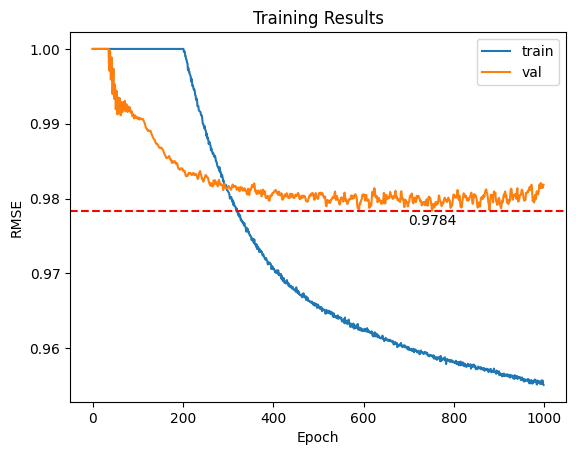

Testing INIT_EMBS_STD=0.1
Epoch 100 - Best Val: 0.9876 at 93 - mv-avg: - Train: 1.1967 - Val: 1.1008
Epoch 200 - Best Val: 0.9847 at 182 - mv-avg: - Train: 1.0071 - Val: 0.9864
Epoch 300 - Best Val: 0.9811 at 285 - mv-avg: - Train: 0.9884 - Val: 0.9831
Epoch 400 - Best Val: 0.9811 at 311 - mv-avg: - Train: 0.9766 - Val: 0.9822
Epoch 500 - Best Val: 0.9801 at 447 - mv-avg: - Train: 0.9703 - Val: 0.9817
Epoch 600 - Best Val: 0.9801 at 447 - mv-avg: - Train: 0.9656 - Val: 0.9816
Epoch 700 - Best Val: 0.9801 at 447 - mv-avg: - Train: 0.9627 - Val: 0.9829
Epoch 800 - Best Val: 0.9801 at 447 - mv-avg: - Train: 0.9613 - Val: 0.9834
Epoch 900 - Best Val: 0.9801 at 447 - mv-avg: - Train: 0.9605 - Val: 0.9840
Best val loss: 0.9801 at epoch 447


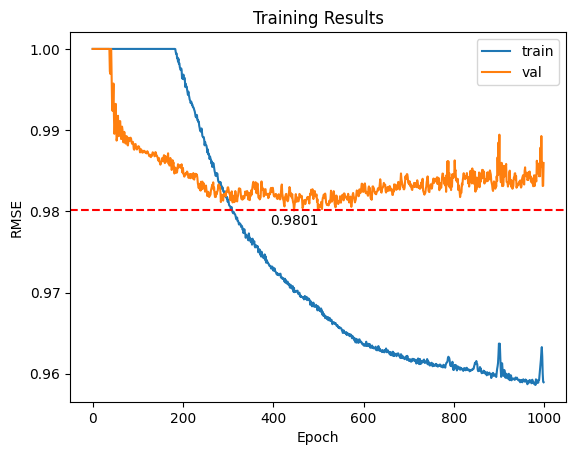

In [13]:

# Test varying INIT_EMBS_STD
for value in init_embs_stds:
    model = LightGCNPlus(A_tilde, ACT_FN, K, L, value, DROPOUT, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    loss_fn = nn.MSELoss()
    print(f"Testing INIT_EMBS_STD={value}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((value, LR, WEIGHT_DECAY, DROPOUT, ACT_FN))


Testing LR=0.01
Epoch 100 - Best Val: 0.9927 at 101 - mv-avg: - Train: 1.3272 - Val: 1.2338
Epoch 200 - Best Val: 0.9892 at 201 - mv-avg: - Train: 1.0473 - Val: 0.9908
Epoch 300 - Best Val: 0.9886 at 278 - mv-avg: - Train: 1.0381 - Val: 0.9891
Epoch 400 - Best Val: 0.9883 at 401 - mv-avg: - Train: 1.0352 - Val: 0.9888
Epoch 500 - Best Val: 0.9878 at 497 - mv-avg: - Train: 1.0328 - Val: 0.9885
Epoch 600 - Best Val: 0.9872 at 601 - mv-avg: - Train: 1.0301 - Val: 0.9881
Epoch 700 - Best Val: 0.9839 at 697 - mv-avg: - Train: 1.0257 - Val: 0.9866
Epoch 800 - Best Val: 0.9807 at 800 - mv-avg: - Train: 1.0163 - Val: 0.9822
Epoch 900 - Best Val: 0.9799 at 878 - mv-avg: - Train: 1.0118 - Val: 0.9808
Best val loss: 0.9798 at epoch 992


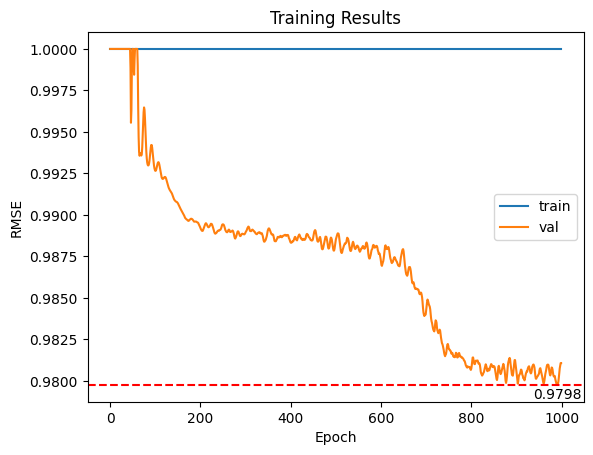

Testing LR=0.03
Epoch 100 - Best Val: 0.9917 at 98 - mv-avg: - Train: 1.1868 - Val: 1.0962
Epoch 200 - Best Val: 0.9865 at 199 - mv-avg: - Train: 1.0282 - Val: 0.9901
Epoch 300 - Best Val: 0.9815 at 242 - mv-avg: - Train: 1.0134 - Val: 0.9831
Epoch 400 - Best Val: 0.9805 at 399 - mv-avg: - Train: 1.0029 - Val: 0.9816
Epoch 500 - Best Val: 0.9802 at 422 - mv-avg: - Train: 0.9961 - Val: 0.9811
Epoch 600 - Best Val: 0.9802 at 422 - mv-avg: - Train: 0.9902 - Val: 0.9812
Epoch 700 - Best Val: 0.9798 at 694 - mv-avg: - Train: 0.9850 - Val: 0.9808
Epoch 800 - Best Val: 0.9792 at 755 - mv-avg: - Train: 0.9803 - Val: 0.9802
Epoch 900 - Best Val: 0.9782 at 861 - mv-avg: - Train: 0.9740 - Val: 0.9794
Best val loss: 0.9778 at epoch 935


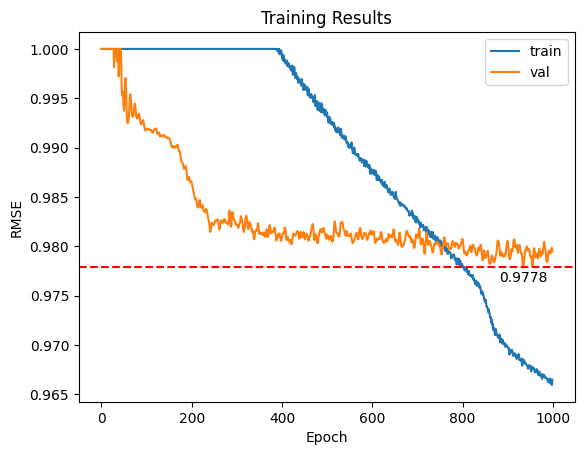

Testing LR=0.05
Epoch 100 - Best Val: 0.9905 at 101 - mv-avg: - Train: 1.1470 - Val: 1.0631
Epoch 200 - Best Val: 0.9889 at 201 - mv-avg: - Train: 1.0189 - Val: 0.9900
Epoch 300 - Best Val: 0.9812 at 297 - mv-avg: - Train: 1.0023 - Val: 0.9862
Epoch 400 - Best Val: 0.9777 at 382 - mv-avg: - Train: 0.9862 - Val: 0.9797
Epoch 500 - Best Val: 0.9773 at 434 - mv-avg: - Train: 0.9765 - Val: 0.9786
Epoch 600 - Best Val: 0.9773 at 434 - mv-avg: - Train: 0.9704 - Val: 0.9794
Epoch 700 - Best Val: 0.9773 at 434 - mv-avg: - Train: 0.9662 - Val: 0.9799
Epoch 800 - Best Val: 0.9773 at 434 - mv-avg: - Train: 0.9629 - Val: 0.9795
Epoch 900 - Best Val: 0.9773 at 434 - mv-avg: - Train: 0.9581 - Val: 0.9796
Best val loss: 0.9773 at epoch 434


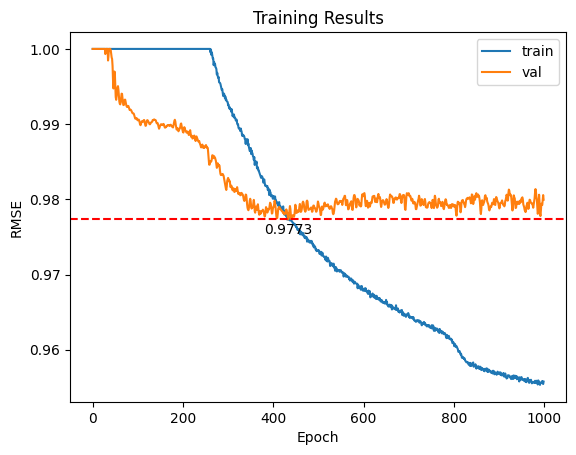

Testing LR=0.07
Epoch 100 - Best Val: 0.9872 at 95 - mv-avg: - Train: 1.0961 - Val: 1.0198
Epoch 200 - Best Val: 0.9807 at 184 - mv-avg: - Train: 1.0017 - Val: 0.9831
Epoch 300 - Best Val: 0.9782 at 281 - mv-avg: - Train: 0.9828 - Val: 0.9806
Epoch 400 - Best Val: 0.9782 at 281 - mv-avg: - Train: 0.9686 - Val: 0.9804
Epoch 500 - Best Val: 0.9769 at 499 - mv-avg: - Train: 0.9618 - Val: 0.9790
Epoch 600 - Best Val: 0.9762 at 535 - mv-avg: - Train: 0.9581 - Val: 0.9779
Epoch 700 - Best Val: 0.9760 at 700 - mv-avg: - Train: 0.9558 - Val: 0.9777
Epoch 800 - Best Val: 0.9758 at 718 - mv-avg: - Train: 0.9526 - Val: 0.9786
Epoch 900 - Best Val: 0.9758 at 718 - mv-avg: - Train: 0.9505 - Val: 0.9794
Best val loss: 0.9758 at epoch 718


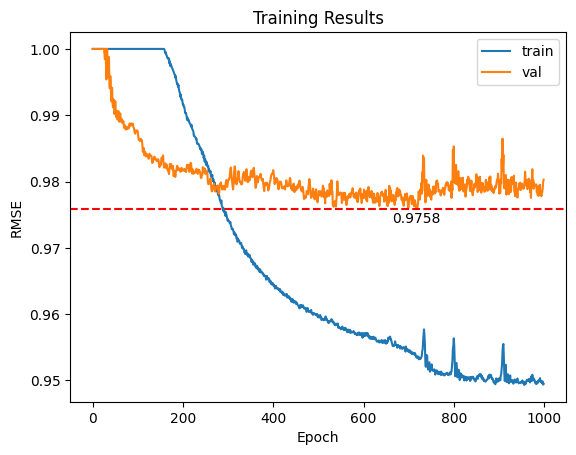

Testing LR=0.1
Epoch 100 - Best Val: 0.9903 at 53 - mv-avg: - Train: 1.2758 - Val: 1.1571
Epoch 200 - Best Val: 0.9861 at 200 - mv-avg: - Train: 1.0223 - Val: 0.9892
Epoch 300 - Best Val: 0.9813 at 278 - mv-avg: - Train: 0.9939 - Val: 0.9831
Epoch 400 - Best Val: 0.9790 at 388 - mv-avg: - Train: 0.9817 - Val: 0.9804
Epoch 500 - Best Val: 0.9785 at 482 - mv-avg: - Train: 0.9734 - Val: 0.9794
Epoch 600 - Best Val: 0.9780 at 564 - mv-avg: - Train: 0.9680 - Val: 0.9789
Epoch 700 - Best Val: 0.9780 at 564 - mv-avg: - Train: 0.9653 - Val: 0.9793
Epoch 800 - Best Val: 0.9780 at 564 - mv-avg: - Train: 0.9640 - Val: 0.9795
Epoch 900 - Best Val: 0.9780 at 564 - mv-avg: - Train: 0.9631 - Val: 0.9798
Best val loss: 0.9780 at epoch 564


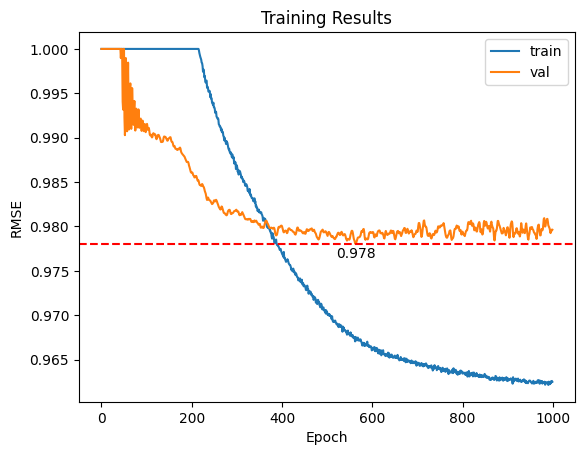

Testing LR=0.13
Epoch 100 - Best Val: 0.9962 at 101 - mv-avg: - Train: 1.8549 - Val: 1.5704
Epoch 200 - Best Val: 0.9895 at 199 - mv-avg: - Train: 1.0527 - Val: 0.9920
Epoch 300 - Best Val: 0.9871 at 287 - mv-avg: - Train: 1.0121 - Val: 0.9886
Epoch 400 - Best Val: 0.9857 at 380 - mv-avg: - Train: 0.9988 - Val: 0.9869
Epoch 500 - Best Val: 0.9834 at 484 - mv-avg: - Train: 0.9904 - Val: 0.9846
Epoch 600 - Best Val: 0.9820 at 595 - mv-avg: - Train: 0.9853 - Val: 0.9831
Epoch 700 - Best Val: 0.9806 at 685 - mv-avg: - Train: 0.9816 - Val: 0.9815
Epoch 800 - Best Val: 0.9793 at 801 - mv-avg: - Train: 0.9793 - Val: 0.9805
Epoch 900 - Best Val: 0.9778 at 896 - mv-avg: - Train: 0.9773 - Val: 0.9789
Best val loss: 0.9776 at epoch 995


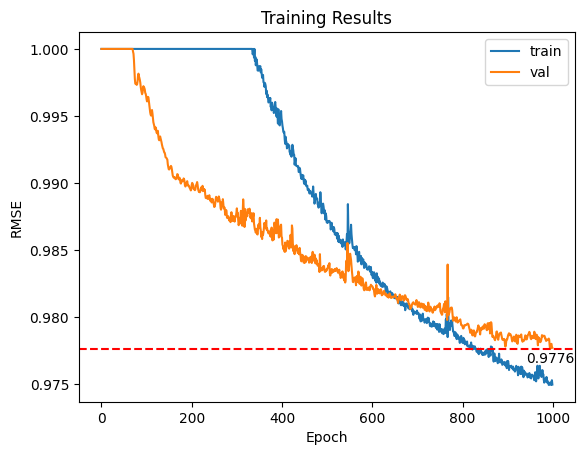

Testing LR=0.15
Epoch 100 - Best Val: 1.0034 at 86 - mv-avg: - Train: 2.2438 - Val: 1.9114
Epoch 200 - Best Val: 0.9983 at 201 - mv-avg: - Train: 1.1091 - Val: 1.0018
Epoch 300 - Best Val: 0.9949 at 300 - mv-avg: - Train: 1.0413 - Val: 0.9966
Epoch 400 - Best Val: 0.9939 at 372 - mv-avg: - Train: 1.0127 - Val: 0.9944
Epoch 500 - Best Val: 0.9927 at 501 - mv-avg: - Train: 1.0015 - Val: 0.9936
Epoch 600 - Best Val: 0.9897 at 601 - mv-avg: - Train: 0.9945 - Val: 0.9912
Epoch 700 - Best Val: 0.9873 at 697 - mv-avg: - Train: 0.9892 - Val: 0.9888
Epoch 800 - Best Val: 0.9868 at 775 - mv-avg: - Train: 0.9848 - Val: 0.9873
Epoch 900 - Best Val: 0.9857 at 872 - mv-avg: - Train: 0.9819 - Val: 0.9863
Best val loss: 0.9841 at epoch 979


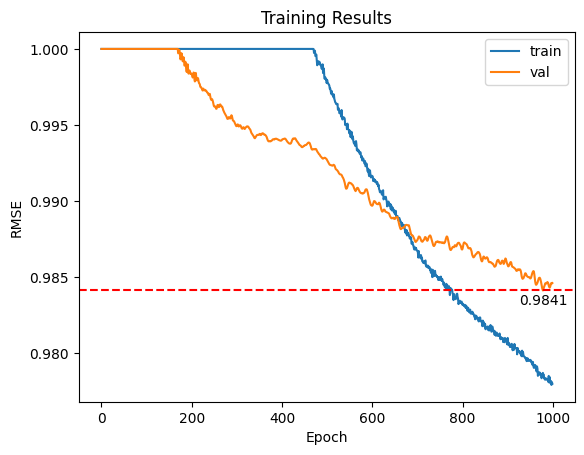

Testing LR=0.17
Epoch 100 - Best Val: 1.0262 at 96 - mv-avg: - Train: 2.7198 - Val: 2.2012
Epoch 200 - Best Val: 1.0019 at 197 - mv-avg: - Train: 1.1682 - Val: 1.0117
Epoch 300 - Best Val: 0.9954 at 301 - mv-avg: - Train: 1.0532 - Val: 0.9978
Epoch 400 - Best Val: 0.9942 at 400 - mv-avg: - Train: 1.0156 - Val: 0.9949
Epoch 500 - Best Val: 0.9924 at 501 - mv-avg: - Train: 1.0046 - Val: 0.9933
Epoch 600 - Best Val: 0.9913 at 598 - mv-avg: - Train: 0.9993 - Val: 0.9919
Epoch 700 - Best Val: 0.9900 at 675 - mv-avg: - Train: 0.9951 - Val: 0.9908
Epoch 800 - Best Val: 0.9888 at 781 - mv-avg: - Train: 0.9918 - Val: 0.9896
Epoch 900 - Best Val: 0.9886 at 859 - mv-avg: - Train: 0.9892 - Val: 0.9890
Best val loss: 0.9883 at epoch 1000


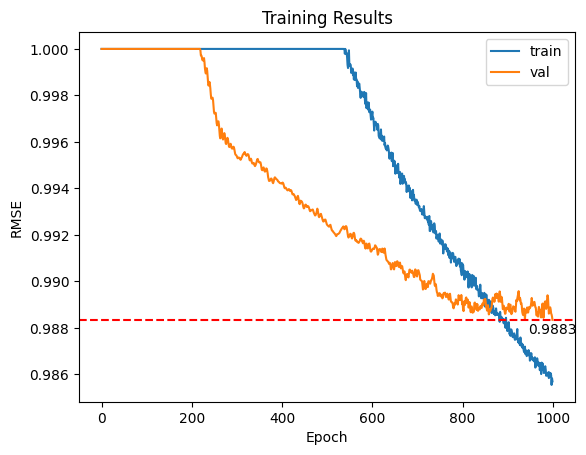

Testing LR=0.2
Epoch 100 - Best Val: 1.0862 at 98 - mv-avg: - Train: 3.9635 - Val: 3.3760
Epoch 200 - Best Val: 1.0149 at 199 - mv-avg: - Train: 1.2329 - Val: 1.0435
Epoch 300 - Best Val: 0.9994 at 300 - mv-avg: - Train: 1.0699 - Val: 1.0044
Epoch 400 - Best Val: 0.9952 at 401 - mv-avg: - Train: 1.0289 - Val: 0.9975
Epoch 500 - Best Val: 0.9922 at 499 - mv-avg: - Train: 1.0137 - Val: 0.9937
Epoch 600 - Best Val: 0.9908 at 598 - mv-avg: - Train: 1.0038 - Val: 0.9914
Epoch 700 - Best Val: 0.9900 at 696 - mv-avg: - Train: 0.9970 - Val: 0.9905
Epoch 800 - Best Val: 0.9898 at 792 - mv-avg: - Train: 0.9922 - Val: 0.9902
Epoch 900 - Best Val: 0.9893 at 885 - mv-avg: - Train: 0.9883 - Val: 0.9897
Best val loss: 0.9891 at epoch 992


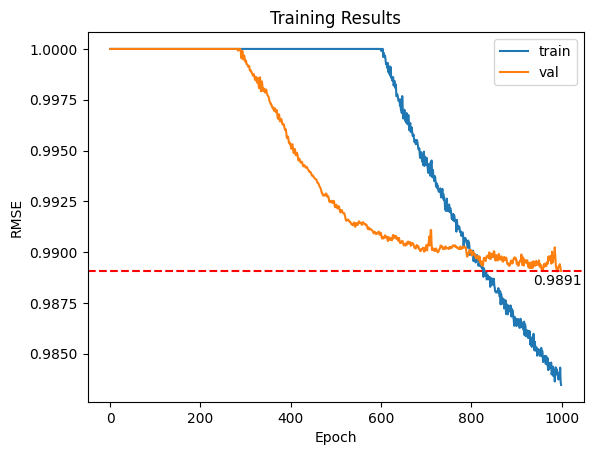

Testing LR=0.25
Epoch 100 - Best Val: 1.0896 at 101 - mv-avg: - Train: 4.8599 - Val: 4.3549
Epoch 200 - Best Val: 1.0165 at 201 - mv-avg: - Train: 1.1015 - Val: 1.0359
Epoch 300 - Best Val: 1.0138 at 299 - mv-avg: - Train: 1.0378 - Val: 1.0143
Epoch 400 - Best Val: 1.0124 at 401 - mv-avg: - Train: 1.0290 - Val: 1.0133
Epoch 500 - Best Val: 1.0107 at 501 - mv-avg: - Train: 1.0259 - Val: 1.0116
Epoch 600 - Best Val: 1.0084 at 597 - mv-avg: - Train: 1.0228 - Val: 1.0096
Epoch 700 - Best Val: 1.0057 at 698 - mv-avg: - Train: 1.0194 - Val: 1.0070
Epoch 800 - Best Val: 1.0030 at 801 - mv-avg: - Train: 1.0147 - Val: 1.0041
Epoch 900 - Best Val: 1.0010 at 894 - mv-avg: - Train: 1.0101 - Val: 1.0022
Best val loss: 0.9990 at epoch 995


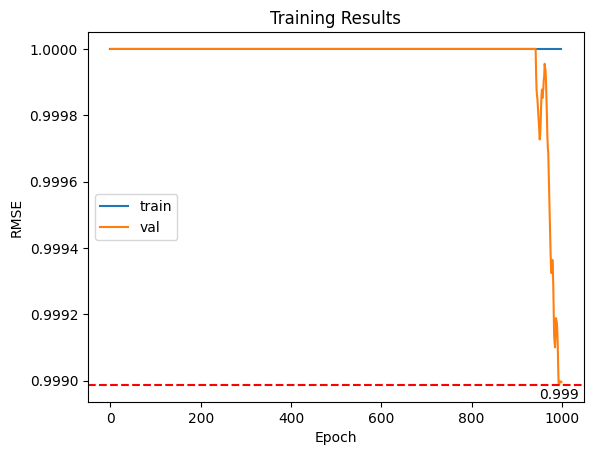

In [14]:
# Test varying LR
for value in lrs:
    model = LightGCNPlus(A_tilde, ACT_FN, K, L, INIT_EMBS_STD, DROPOUT, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=value, weight_decay=WEIGHT_DECAY)
    loss_fn = nn.MSELoss()
    print(f"Testing LR={value}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((INIT_EMBS_STD, value, WEIGHT_DECAY, DROPOUT, ACT_FN))


Testing WEIGHT_DECAY=1e-05
Epoch 100 - Best Val: 0.9932 at 100 - mv-avg: - Train: 1.3599 - Val: 1.2055
Epoch 200 - Best Val: 0.9850 at 201 - mv-avg: - Train: 1.0214 - Val: 0.9888
Epoch 300 - Best Val: 0.9846 at 220 - mv-avg: - Train: 0.9919 - Val: 0.9851
Epoch 400 - Best Val: 0.9846 at 220 - mv-avg: - Train: 0.9756 - Val: 0.9855
Epoch 500 - Best Val: 0.9846 at 220 - mv-avg: - Train: 0.9661 - Val: 0.9860
Epoch 600 - Best Val: 0.9846 at 220 - mv-avg: - Train: 0.9588 - Val: 0.9863
Epoch 700 - Best Val: 0.9846 at 220 - mv-avg: - Train: 0.9534 - Val: 0.9865
Epoch 800 - Best Val: 0.9846 at 220 - mv-avg: - Train: 0.9494 - Val: 0.9862
Epoch 900 - Best Val: 0.9846 at 220 - mv-avg: - Train: 0.9462 - Val: 0.9863
Best val loss: 0.9846 at epoch 220


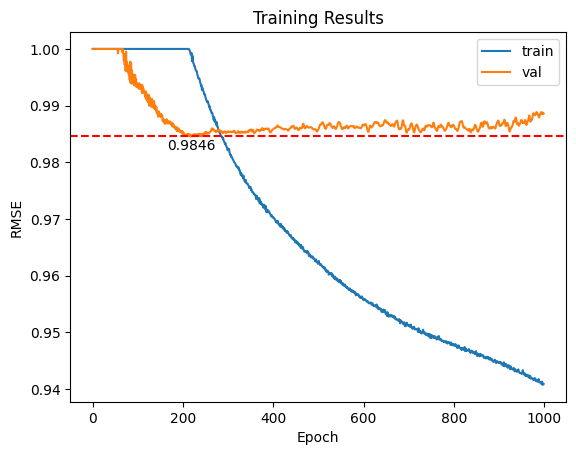

Testing WEIGHT_DECAY=1.5e-05
Epoch 100 - Best Val: 0.9920 at 56 - mv-avg: - Train: 1.3133 - Val: 1.1943
Epoch 200 - Best Val: 0.9854 at 201 - mv-avg: - Train: 1.0115 - Val: 0.9889
Epoch 300 - Best Val: 0.9830 at 268 - mv-avg: - Train: 0.9864 - Val: 0.9840
Epoch 400 - Best Val: 0.9830 at 268 - mv-avg: - Train: 0.9699 - Val: 0.9841
Epoch 500 - Best Val: 0.9830 at 268 - mv-avg: - Train: 0.9584 - Val: 0.9844
Epoch 600 - Best Val: 0.9830 at 268 - mv-avg: - Train: 0.9501 - Val: 0.9855
Epoch 700 - Best Val: 0.9830 at 268 - mv-avg: - Train: 0.9440 - Val: 0.9868
Epoch 800 - Best Val: 0.9830 at 268 - mv-avg: - Train: 0.9403 - Val: 0.9874
Epoch 900 - Best Val: 0.9830 at 268 - mv-avg: - Train: 0.9379 - Val: 0.9878
Best val loss: 0.9830 at epoch 268


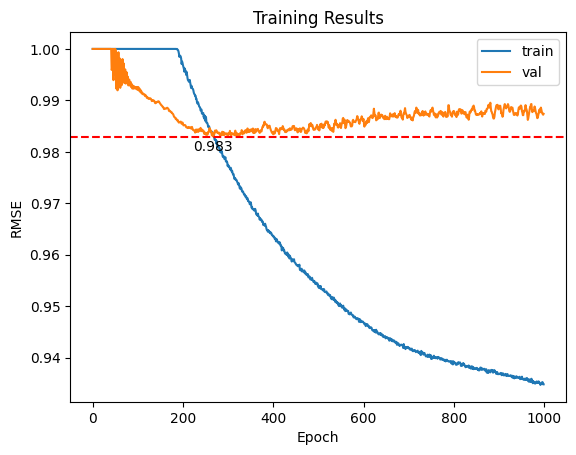

Testing WEIGHT_DECAY=2e-05
Epoch 100 - Best Val: 0.9823 at 91 - mv-avg: - Train: 1.2907 - Val: 1.1850
Epoch 200 - Best Val: 0.9801 at 196 - mv-avg: - Train: 1.0020 - Val: 0.9815
Epoch 300 - Best Val: 0.9793 at 262 - mv-avg: - Train: 0.9844 - Val: 0.9801
Epoch 400 - Best Val: 0.9793 at 262 - mv-avg: - Train: 0.9717 - Val: 0.9808
Epoch 500 - Best Val: 0.9793 at 262 - mv-avg: - Train: 0.9627 - Val: 0.9826
Epoch 600 - Best Val: 0.9793 at 262 - mv-avg: - Train: 0.9572 - Val: 0.9829
Epoch 700 - Best Val: 0.9793 at 262 - mv-avg: - Train: 0.9533 - Val: 0.9822
Epoch 800 - Best Val: 0.9793 at 262 - mv-avg: - Train: 0.9498 - Val: 0.9821
Epoch 900 - Best Val: 0.9793 at 262 - mv-avg: - Train: 0.9468 - Val: 0.9827
Best val loss: 0.9793 at epoch 262


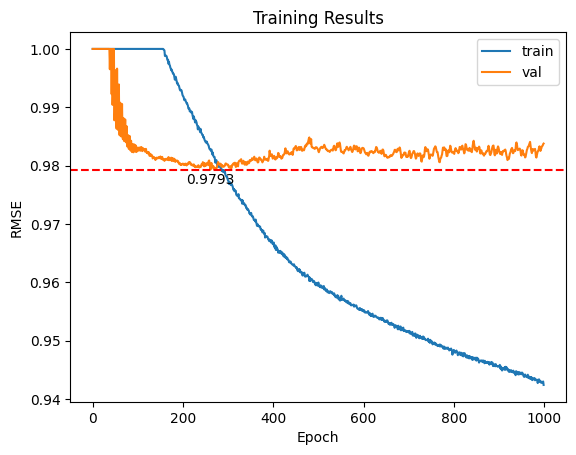

Testing WEIGHT_DECAY=2.5e-05
Epoch 100 - Best Val: 0.9905 at 101 - mv-avg: - Train: 1.4401 - Val: 1.2974
Epoch 200 - Best Val: 0.9857 at 201 - mv-avg: - Train: 1.0242 - Val: 0.9877
Epoch 300 - Best Val: 0.9829 at 301 - mv-avg: - Train: 1.0014 - Val: 0.9844
Epoch 400 - Best Val: 0.9819 at 394 - mv-avg: - Train: 0.9859 - Val: 0.9826
Epoch 500 - Best Val: 0.9812 at 431 - mv-avg: - Train: 0.9754 - Val: 0.9823
Epoch 600 - Best Val: 0.9812 at 431 - mv-avg: - Train: 0.9681 - Val: 0.9827
Epoch 700 - Best Val: 0.9812 at 431 - mv-avg: - Train: 0.9629 - Val: 0.9835
Epoch 800 - Best Val: 0.9812 at 431 - mv-avg: - Train: 0.9591 - Val: 0.9840
Epoch 900 - Best Val: 0.9812 at 431 - mv-avg: - Train: 0.9564 - Val: 0.9842
Best val loss: 0.9812 at epoch 431


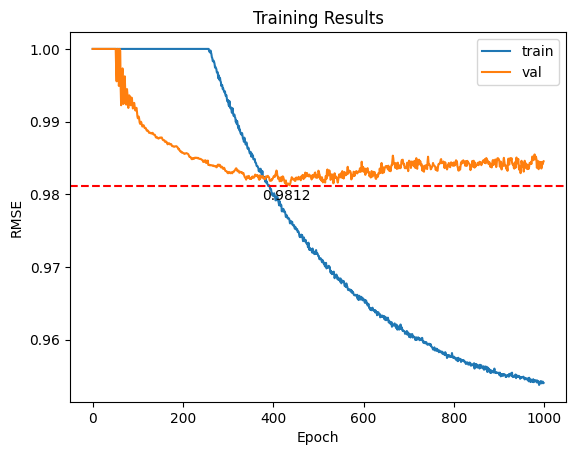

Testing WEIGHT_DECAY=3e-05
Epoch 100 - Best Val: 0.9925 at 92 - mv-avg: - Train: 1.5164 - Val: 1.2970
Epoch 200 - Best Val: 0.9920 at 200 - mv-avg: - Train: 1.0469 - Val: 0.9929
Epoch 300 - Best Val: 0.9885 at 301 - mv-avg: - Train: 1.0067 - Val: 0.9903
Epoch 400 - Best Val: 0.9853 at 394 - mv-avg: - Train: 0.9885 - Val: 0.9869
Epoch 500 - Best Val: 0.9827 at 500 - mv-avg: - Train: 0.9779 - Val: 0.9837
Epoch 600 - Best Val: 0.9818 at 555 - mv-avg: - Train: 0.9719 - Val: 0.9826
Epoch 700 - Best Val: 0.9817 at 644 - mv-avg: - Train: 0.9683 - Val: 0.9827
Epoch 800 - Best Val: 0.9817 at 644 - mv-avg: - Train: 0.9655 - Val: 0.9824
Epoch 900 - Best Val: 0.9812 at 887 - mv-avg: - Train: 0.9633 - Val: 0.9820
Best val loss: 0.9812 at epoch 887


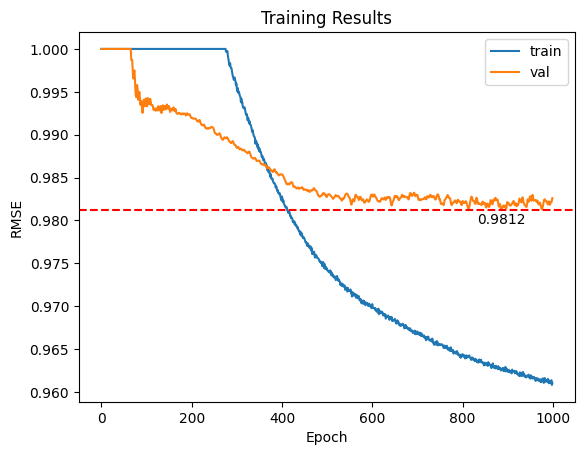

Testing WEIGHT_DECAY=4e-05
Epoch 100 - Best Val: 0.9907 at 101 - mv-avg: - Train: 1.3373 - Val: 1.2044
Epoch 200 - Best Val: 0.9889 at 186 - mv-avg: - Train: 1.0211 - Val: 0.9896
Epoch 300 - Best Val: 0.9867 at 295 - mv-avg: - Train: 0.9969 - Val: 0.9880
Epoch 400 - Best Val: 0.9826 at 400 - mv-avg: - Train: 0.9824 - Val: 0.9847
Epoch 500 - Best Val: 0.9805 at 489 - mv-avg: - Train: 0.9729 - Val: 0.9819
Epoch 600 - Best Val: 0.9792 at 579 - mv-avg: - Train: 0.9671 - Val: 0.9804
Epoch 700 - Best Val: 0.9787 at 637 - mv-avg: - Train: 0.9635 - Val: 0.9796
Epoch 800 - Best Val: 0.9775 at 779 - mv-avg: - Train: 0.9608 - Val: 0.9785
Epoch 900 - Best Val: 0.9770 at 870 - mv-avg: - Train: 0.9587 - Val: 0.9780
Best val loss: 0.9770 at epoch 870


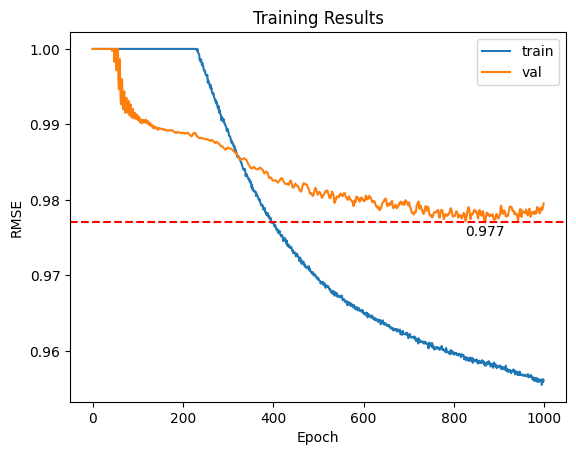

Testing WEIGHT_DECAY=5e-05
Epoch 100 - Best Val: 0.9936 at 100 - mv-avg: - Train: 1.3796 - Val: 1.2377
Epoch 200 - Best Val: 0.9893 at 200 - mv-avg: - Train: 1.0228 - Val: 0.9908
Epoch 300 - Best Val: 0.9879 at 288 - mv-avg: - Train: 0.9984 - Val: 0.9885
Epoch 400 - Best Val: 0.9867 at 401 - mv-avg: - Train: 0.9871 - Val: 0.9877
Epoch 500 - Best Val: 0.9821 at 500 - mv-avg: - Train: 0.9789 - Val: 0.9846
Epoch 600 - Best Val: 0.9800 at 586 - mv-avg: - Train: 0.9741 - Val: 0.9809
Epoch 700 - Best Val: 0.9790 at 694 - mv-avg: - Train: 0.9714 - Val: 0.9796
Epoch 800 - Best Val: 0.9788 at 721 - mv-avg: - Train: 0.9695 - Val: 0.9794
Epoch 900 - Best Val: 0.9784 at 901 - mv-avg: - Train: 0.9685 - Val: 0.9793
Best val loss: 0.9784 at epoch 901


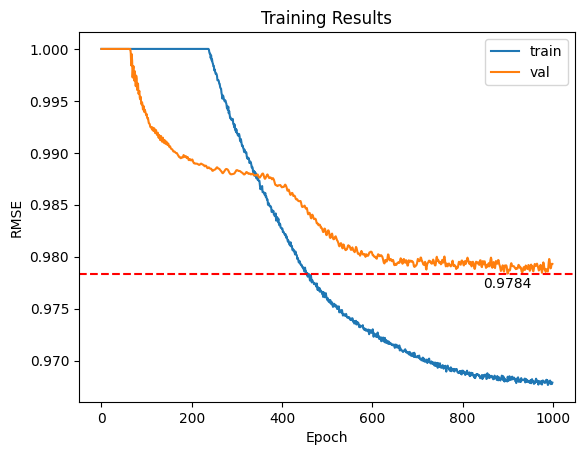

Testing WEIGHT_DECAY=6e-05
Epoch 100 - Best Val: 0.9874 at 101 - mv-avg: - Train: 1.3135 - Val: 1.2070
Epoch 200 - Best Val: 0.9819 at 199 - mv-avg: - Train: 1.0114 - Val: 0.9843
Epoch 300 - Best Val: 0.9791 at 293 - mv-avg: - Train: 0.9911 - Val: 0.9804
Epoch 400 - Best Val: 0.9777 at 382 - mv-avg: - Train: 0.9799 - Val: 0.9789
Epoch 500 - Best Val: 0.9766 at 497 - mv-avg: - Train: 0.9736 - Val: 0.9779
Epoch 600 - Best Val: 0.9759 at 601 - mv-avg: - Train: 0.9698 - Val: 0.9771
Epoch 700 - Best Val: 0.9759 at 601 - mv-avg: - Train: 0.9677 - Val: 0.9771
Epoch 800 - Best Val: 0.9759 at 601 - mv-avg: - Train: 0.9663 - Val: 0.9776
Epoch 900 - Best Val: 0.9759 at 601 - mv-avg: - Train: 0.9653 - Val: 0.9777
Best val loss: 0.9759 at epoch 601


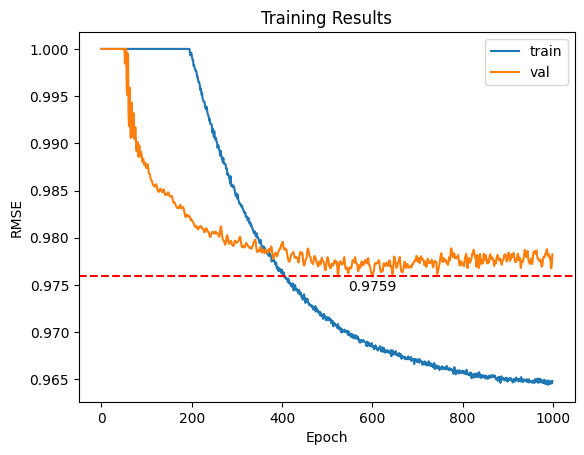

Testing WEIGHT_DECAY=7e-05
Epoch 100 - Best Val: 0.9932 at 101 - mv-avg: - Train: 1.4228 - Val: 1.2654
Epoch 200 - Best Val: 0.9897 at 199 - mv-avg: - Train: 1.0217 - Val: 0.9912
Epoch 300 - Best Val: 0.9871 at 301 - mv-avg: - Train: 0.9994 - Val: 0.9887
Epoch 400 - Best Val: 0.9824 at 400 - mv-avg: - Train: 0.9874 - Val: 0.9854
Epoch 500 - Best Val: 0.9794 at 495 - mv-avg: - Train: 0.9783 - Val: 0.9807
Epoch 600 - Best Val: 0.9784 at 576 - mv-avg: - Train: 0.9752 - Val: 0.9790
Epoch 700 - Best Val: 0.9778 at 697 - mv-avg: - Train: 0.9733 - Val: 0.9786
Epoch 800 - Best Val: 0.9777 at 724 - mv-avg: - Train: 0.9717 - Val: 0.9785
Epoch 900 - Best Val: 0.9777 at 724 - mv-avg: - Train: 0.9706 - Val: 0.9786
Best val loss: 0.9777 at epoch 724


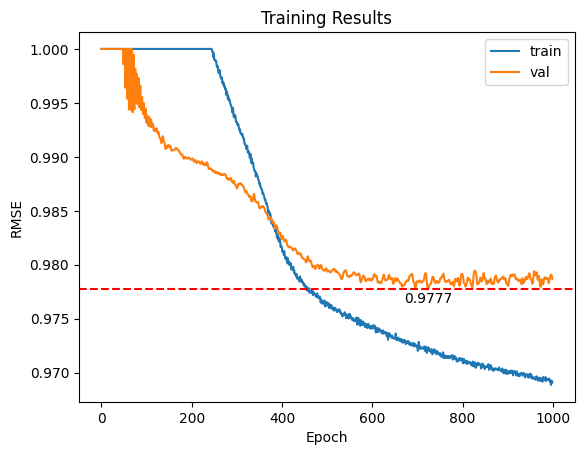

Testing WEIGHT_DECAY=0.0001
Epoch 100 - Best Val: 0.9902 at 101 - mv-avg: - Train: 1.2649 - Val: 1.1564
Epoch 200 - Best Val: 0.9869 at 201 - mv-avg: - Train: 1.0114 - Val: 0.9883
Epoch 300 - Best Val: 0.9850 at 297 - mv-avg: - Train: 0.9969 - Val: 0.9865
Epoch 400 - Best Val: 0.9833 at 399 - mv-avg: - Train: 0.9891 - Val: 0.9847
Epoch 500 - Best Val: 0.9817 at 483 - mv-avg: - Train: 0.9828 - Val: 0.9829
Epoch 600 - Best Val: 0.9802 at 587 - mv-avg: - Train: 0.9783 - Val: 0.9812
Epoch 700 - Best Val: 0.9798 at 700 - mv-avg: - Train: 0.9766 - Val: 0.9807
Epoch 800 - Best Val: 0.9798 at 700 - mv-avg: - Train: 0.9753 - Val: 0.9808
Epoch 900 - Best Val: 0.9798 at 700 - mv-avg: - Train: 0.9746 - Val: 0.9811
Best val loss: 0.9798 at epoch 700


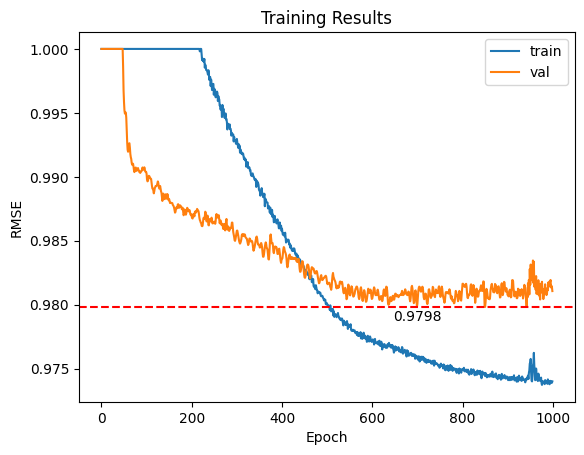

In [15]:

# Test varying WEIGHT_DECAY
for value in weight_decays:
    model = LightGCNPlus(A_tilde, ACT_FN, K, L, INIT_EMBS_STD, DROPOUT, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=value)
    loss_fn = nn.MSELoss()
    print(f"Testing WEIGHT_DECAY={value}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((INIT_EMBS_STD, LR, value, DROPOUT, ACT_FN))


Testing DROPOUT=0.05
Epoch 100 - Best Val: 0.9889 at 101 - mv-avg: - Train: 1.2192 - Val: 1.1896
Epoch 200 - Best Val: 0.9875 at 157 - mv-avg: - Train: 0.9674 - Val: 0.9883
Epoch 300 - Best Val: 0.9875 at 157 - mv-avg: - Train: 0.9443 - Val: 0.9914
Epoch 400 - Best Val: 0.9875 at 157 - mv-avg: - Train: 0.9254 - Val: 0.9958
Epoch 500 - Best Val: 0.9875 at 157 - mv-avg: - Train: 0.9107 - Val: 1.0026
Epoch 600 - Best Val: 0.9875 at 157 - mv-avg: - Train: 0.9013 - Val: 1.0070
Epoch 700 - Best Val: 0.9875 at 157 - mv-avg: - Train: 0.8948 - Val: 1.0091
Epoch 800 - Best Val: 0.9875 at 157 - mv-avg: - Train: 0.8894 - Val: 1.0142
Epoch 900 - Best Val: 0.9875 at 157 - mv-avg: - Train: 0.8847 - Val: 1.0189
Best val loss: 0.9875 at epoch 157


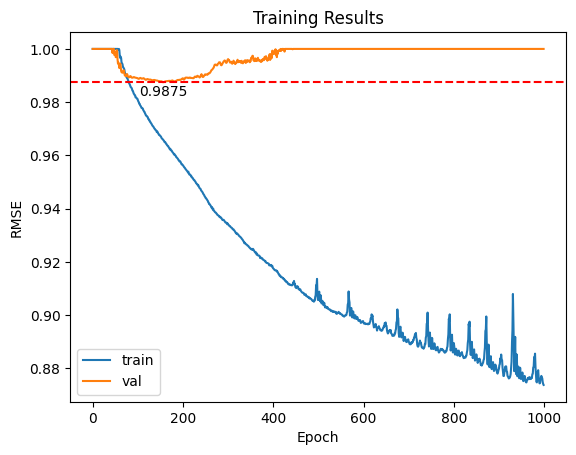

Testing DROPOUT=0.1
Epoch 100 - Best Val: 0.9857 at 101 - mv-avg: - Train: 1.1624 - Val: 1.1331
Epoch 200 - Best Val: 0.9825 at 134 - mv-avg: - Train: 0.9646 - Val: 0.9836
Epoch 300 - Best Val: 0.9825 at 134 - mv-avg: - Train: 0.9511 - Val: 0.9869
Epoch 400 - Best Val: 0.9825 at 134 - mv-avg: - Train: 0.9397 - Val: 0.9894
Epoch 500 - Best Val: 0.9825 at 134 - mv-avg: - Train: 0.9294 - Val: 0.9905
Epoch 600 - Best Val: 0.9825 at 134 - mv-avg: - Train: 0.9203 - Val: 0.9954
Epoch 700 - Best Val: 0.9825 at 134 - mv-avg: - Train: 0.9109 - Val: 1.0022
Epoch 800 - Best Val: 0.9825 at 134 - mv-avg: - Train: 0.9017 - Val: 1.0052
Epoch 900 - Best Val: 0.9825 at 134 - mv-avg: - Train: 0.8950 - Val: 1.0121
Best val loss: 0.9825 at epoch 134


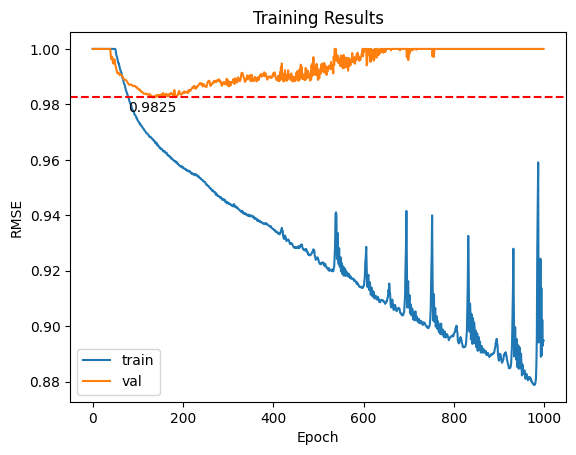

Testing DROPOUT=0.15
Epoch 100 - Best Val: 0.9913 at 99 - mv-avg: - Train: 1.2450 - Val: 1.1970
Epoch 200 - Best Val: 0.9810 at 199 - mv-avg: - Train: 0.9911 - Val: 0.9868
Epoch 300 - Best Val: 0.9800 at 209 - mv-avg: - Train: 0.9782 - Val: 0.9807
Epoch 400 - Best Val: 0.9800 at 209 - mv-avg: - Train: 0.9715 - Val: 0.9817
Epoch 500 - Best Val: 0.9800 at 209 - mv-avg: - Train: 0.9640 - Val: 0.9823
Epoch 600 - Best Val: 0.9800 at 209 - mv-avg: - Train: 0.9572 - Val: 0.9852
Epoch 700 - Best Val: 0.9800 at 209 - mv-avg: - Train: 0.9514 - Val: 0.9876
Epoch 800 - Best Val: 0.9800 at 209 - mv-avg: - Train: 0.9455 - Val: 0.9872
Epoch 900 - Best Val: 0.9800 at 209 - mv-avg: - Train: 0.9404 - Val: 0.9898
Best val loss: 0.9800 at epoch 209


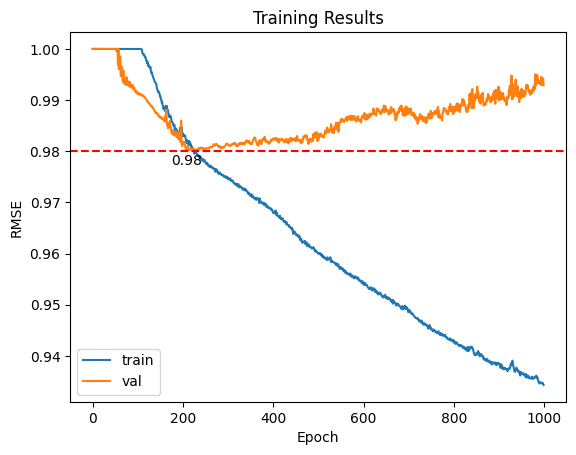

Testing DROPOUT=0.2
Epoch 100 - Best Val: 0.9913 at 79 - mv-avg: - Train: 1.4185 - Val: 1.2967
Epoch 200 - Best Val: 0.9864 at 190 - mv-avg: - Train: 1.0225 - Val: 0.9888
Epoch 300 - Best Val: 0.9827 at 292 - mv-avg: - Train: 0.9922 - Val: 0.9843
Epoch 400 - Best Val: 0.9827 at 323 - mv-avg: - Train: 0.9737 - Val: 0.9837
Epoch 500 - Best Val: 0.9827 at 323 - mv-avg: - Train: 0.9629 - Val: 0.9836
Epoch 600 - Best Val: 0.9819 at 551 - mv-avg: - Train: 0.9549 - Val: 0.9829
Epoch 700 - Best Val: 0.9819 at 551 - mv-avg: - Train: 0.9480 - Val: 0.9833
Epoch 800 - Best Val: 0.9819 at 551 - mv-avg: - Train: 0.9438 - Val: 0.9844
Epoch 900 - Best Val: 0.9819 at 551 - mv-avg: - Train: 0.9405 - Val: 0.9848
Best val loss: 0.9819 at epoch 551


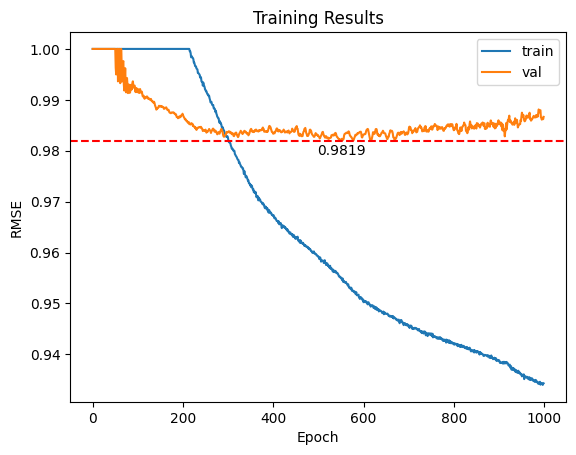

Testing DROPOUT=0.25
Epoch 100 - Best Val: 0.9899 at 79 - mv-avg: - Train: 1.2202 - Val: 1.1497
Epoch 200 - Best Val: 0.9822 at 201 - mv-avg: - Train: 0.9985 - Val: 0.9873
Epoch 300 - Best Val: 0.9806 at 297 - mv-avg: - Train: 0.9797 - Val: 0.9817
Epoch 400 - Best Val: 0.9806 at 297 - mv-avg: - Train: 0.9681 - Val: 0.9817
Epoch 500 - Best Val: 0.9806 at 297 - mv-avg: - Train: 0.9586 - Val: 0.9836
Epoch 600 - Best Val: 0.9806 at 297 - mv-avg: - Train: 0.9515 - Val: 0.9855
Epoch 700 - Best Val: 0.9806 at 297 - mv-avg: - Train: 0.9448 - Val: 0.9852
Epoch 800 - Best Val: 0.9806 at 297 - mv-avg: - Train: 0.9401 - Val: 0.9840
Epoch 900 - Best Val: 0.9806 at 297 - mv-avg: - Train: 0.9359 - Val: 0.9839
Best val loss: 0.9806 at epoch 297


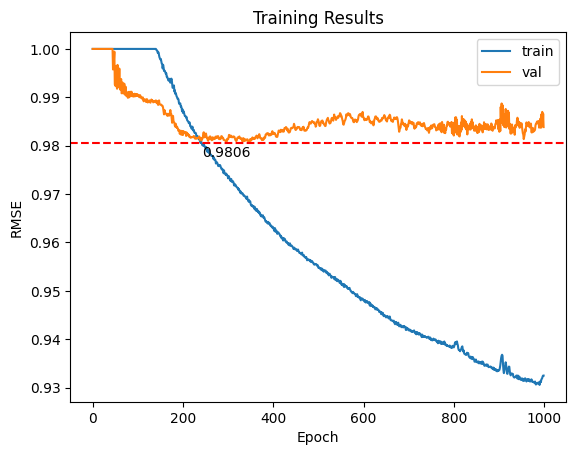

Testing DROPOUT=0.3
Epoch 100 - Best Val: 0.9951 at 101 - mv-avg: - Train: 1.4064 - Val: 1.3041
Epoch 200 - Best Val: 0.9920 at 200 - mv-avg: - Train: 1.0273 - Val: 0.9938
Epoch 300 - Best Val: 0.9893 at 301 - mv-avg: - Train: 1.0017 - Val: 0.9908
Epoch 400 - Best Val: 0.9868 at 401 - mv-avg: - Train: 0.9878 - Val: 0.9884
Epoch 500 - Best Val: 0.9833 at 499 - mv-avg: - Train: 0.9779 - Val: 0.9849
Epoch 600 - Best Val: 0.9817 at 597 - mv-avg: - Train: 0.9705 - Val: 0.9825
Epoch 700 - Best Val: 0.9811 at 699 - mv-avg: - Train: 0.9659 - Val: 0.9817
Epoch 800 - Best Val: 0.9805 at 719 - mv-avg: - Train: 0.9627 - Val: 0.9814
Epoch 900 - Best Val: 0.9805 at 719 - mv-avg: - Train: 0.9607 - Val: 0.9817
Best val loss: 0.9805 at epoch 719


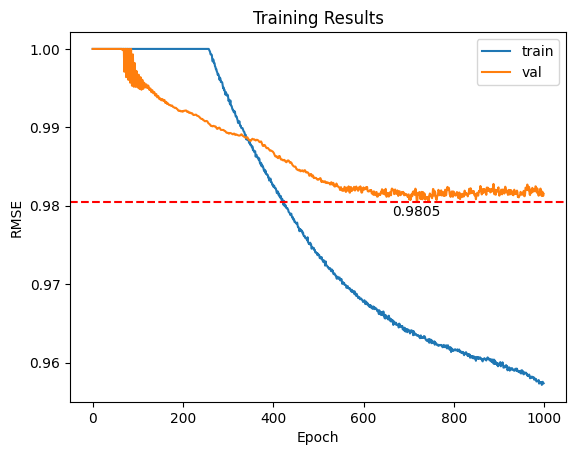

Testing DROPOUT=0.35
Epoch 100 - Best Val: 0.9923 at 100 - mv-avg: - Train: 1.2702 - Val: 1.1695
Epoch 200 - Best Val: 0.9834 at 167 - mv-avg: - Train: 0.9988 - Val: 0.9868
Epoch 300 - Best Val: 0.9810 at 279 - mv-avg: - Train: 0.9786 - Val: 0.9821
Epoch 400 - Best Val: 0.9805 at 342 - mv-avg: - Train: 0.9715 - Val: 0.9814
Epoch 500 - Best Val: 0.9794 at 496 - mv-avg: - Train: 0.9650 - Val: 0.9806
Epoch 600 - Best Val: 0.9772 at 570 - mv-avg: - Train: 0.9586 - Val: 0.9789
Epoch 700 - Best Val: 0.9772 at 570 - mv-avg: - Train: 0.9535 - Val: 0.9787
Epoch 800 - Best Val: 0.9768 at 736 - mv-avg: - Train: 0.9518 - Val: 0.9781
Epoch 900 - Best Val: 0.9768 at 736 - mv-avg: - Train: 0.9499 - Val: 0.9783
Best val loss: 0.9768 at epoch 736


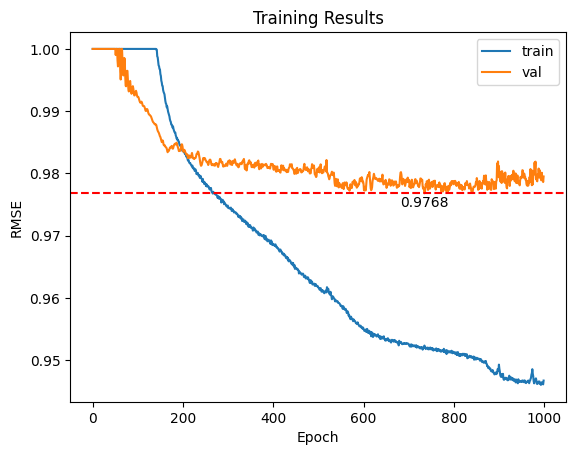

Testing DROPOUT=0.4
Epoch 100 - Best Val: 0.9898 at 98 - mv-avg: - Train: 1.2751 - Val: 1.1637
Epoch 200 - Best Val: 0.9880 at 192 - mv-avg: - Train: 1.0182 - Val: 0.9889
Epoch 300 - Best Val: 0.9880 at 212 - mv-avg: - Train: 0.9885 - Val: 0.9889
Epoch 400 - Best Val: 0.9866 at 396 - mv-avg: - Train: 0.9737 - Val: 0.9878
Epoch 500 - Best Val: 0.9851 at 493 - mv-avg: - Train: 0.9643 - Val: 0.9862
Epoch 600 - Best Val: 0.9840 at 598 - mv-avg: - Train: 0.9579 - Val: 0.9854
Epoch 700 - Best Val: 0.9828 at 699 - mv-avg: - Train: 0.9545 - Val: 0.9843
Epoch 800 - Best Val: 0.9826 at 795 - mv-avg: - Train: 0.9520 - Val: 0.9837
Epoch 900 - Best Val: 0.9824 at 821 - mv-avg: - Train: 0.9495 - Val: 0.9835
Best val loss: 0.9824 at epoch 821


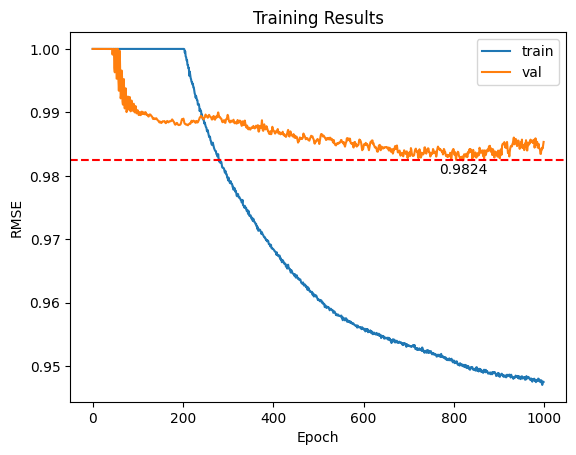

Testing DROPOUT=0.45
Epoch 100 - Best Val: 0.9869 at 100 - mv-avg: - Train: 1.2528 - Val: 1.1702
Epoch 200 - Best Val: 0.9814 at 196 - mv-avg: - Train: 1.0066 - Val: 0.9831
Epoch 300 - Best Val: 0.9803 at 287 - mv-avg: - Train: 0.9902 - Val: 0.9811
Epoch 400 - Best Val: 0.9802 at 357 - mv-avg: - Train: 0.9815 - Val: 0.9809
Epoch 500 - Best Val: 0.9794 at 489 - mv-avg: - Train: 0.9748 - Val: 0.9803
Epoch 600 - Best Val: 0.9785 at 601 - mv-avg: - Train: 0.9693 - Val: 0.9793
Epoch 700 - Best Val: 0.9783 at 602 - mv-avg: - Train: 0.9647 - Val: 0.9791
Epoch 800 - Best Val: 0.9783 at 602 - mv-avg: - Train: 0.9607 - Val: 0.9801
Epoch 900 - Best Val: 0.9783 at 602 - mv-avg: - Train: 0.9572 - Val: 0.9799
Best val loss: 0.9781 at epoch 998


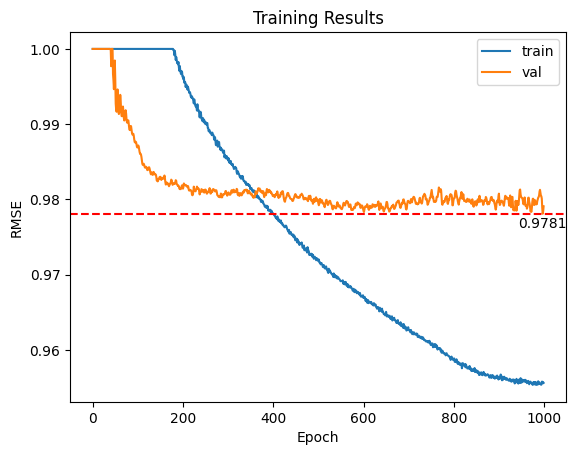

Testing DROPOUT=0.5
Epoch 100 - Best Val: 0.9926 at 101 - mv-avg: - Train: 1.2429 - Val: 1.1317
Epoch 200 - Best Val: 0.9905 at 201 - mv-avg: - Train: 1.0185 - Val: 0.9921
Epoch 300 - Best Val: 0.9854 at 299 - mv-avg: - Train: 0.9979 - Val: 0.9878
Epoch 400 - Best Val: 0.9832 at 400 - mv-avg: - Train: 0.9845 - Val: 0.9847
Epoch 500 - Best Val: 0.9823 at 482 - mv-avg: - Train: 0.9765 - Val: 0.9829
Epoch 600 - Best Val: 0.9821 at 513 - mv-avg: - Train: 0.9715 - Val: 0.9834
Epoch 700 - Best Val: 0.9821 at 513 - mv-avg: - Train: 0.9685 - Val: 0.9835
Epoch 800 - Best Val: 0.9821 at 513 - mv-avg: - Train: 0.9669 - Val: 0.9834
Epoch 900 - Best Val: 0.9821 at 886 - mv-avg: - Train: 0.9656 - Val: 0.9832
Best val loss: 0.9821 at epoch 886


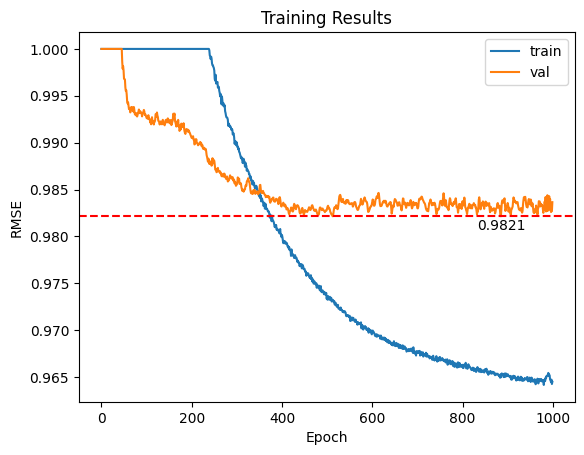

In [16]:

# Test varying DROPOUT
for value in dropouts:
    model = LightGCNPlus(A_tilde, ACT_FN, K, L, INIT_EMBS_STD, value, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    loss_fn = nn.MSELoss()
    print(f"Testing DROPOUT={value}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((INIT_EMBS_STD, LR, WEIGHT_DECAY, value, ACT_FN))


Testing ACT_FN=GELU(approximate='none')
Epoch 100 - Best Val: 0.9970 at 101 - mv-avg: - Train: 1.5132 - Val: 1.3362
Epoch 200 - Best Val: 0.9925 at 201 - mv-avg: - Train: 1.0568 - Val: 0.9946
Epoch 300 - Best Val: 0.9895 at 301 - mv-avg: - Train: 1.0105 - Val: 0.9908
Epoch 400 - Best Val: 0.9881 at 400 - mv-avg: - Train: 0.9924 - Val: 0.9887
Epoch 500 - Best Val: 0.9872 at 499 - mv-avg: - Train: 0.9852 - Val: 0.9878
Epoch 600 - Best Val: 0.9841 at 601 - mv-avg: - Train: 0.9803 - Val: 0.9860
Epoch 700 - Best Val: 0.9811 at 701 - mv-avg: - Train: 0.9752 - Val: 0.9826
Epoch 800 - Best Val: 0.9807 at 769 - mv-avg: - Train: 0.9724 - Val: 0.9812
Epoch 900 - Best Val: 0.9804 at 827 - mv-avg: - Train: 0.9704 - Val: 0.9808
Best val loss: 0.9800 at epoch 913


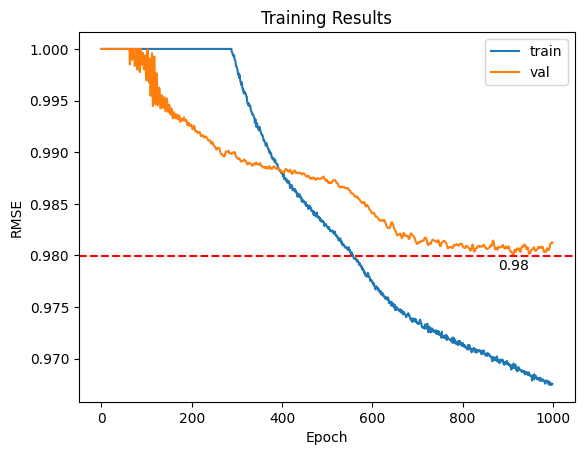

Testing ACT_FN=ReLU()
Epoch 100 - Best Val: 0.9916 at 63 - mv-avg: - Train: 1.4435 - Val: 1.2653
Epoch 200 - Best Val: 0.9911 at 198 - mv-avg: - Train: 1.0501 - Val: 0.9924
Epoch 300 - Best Val: 0.9903 at 261 - mv-avg: - Train: 1.0133 - Val: 0.9914
Epoch 400 - Best Val: 0.9886 at 399 - mv-avg: - Train: 0.9936 - Val: 0.9906
Epoch 500 - Best Val: 0.9832 at 497 - mv-avg: - Train: 0.9806 - Val: 0.9860
Epoch 600 - Best Val: 0.9829 at 524 - mv-avg: - Train: 0.9708 - Val: 0.9846
Epoch 700 - Best Val: 0.9827 at 657 - mv-avg: - Train: 0.9639 - Val: 0.9839
Epoch 800 - Best Val: 0.9820 at 791 - mv-avg: - Train: 0.9581 - Val: 0.9839
Epoch 900 - Best Val: 0.9818 at 820 - mv-avg: - Train: 0.9530 - Val: 0.9842
Best val loss: 0.9818 at epoch 820


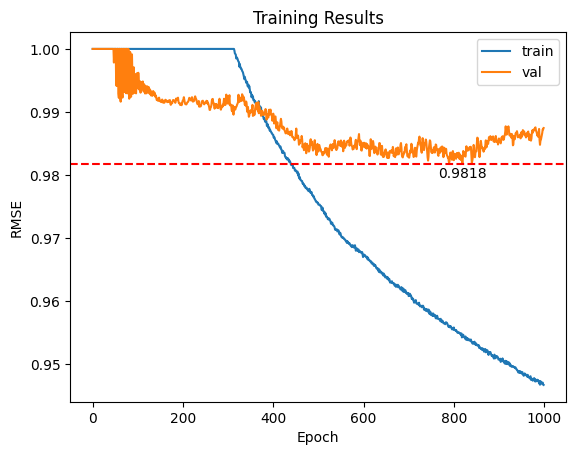

Testing ACT_FN=LeakyReLU(negative_slope=0.01)
Epoch 100 - Best Val: 0.9948 at 100 - mv-avg: - Train: 1.3646 - Val: 1.1988
Epoch 200 - Best Val: 0.9909 at 200 - mv-avg: - Train: 1.0333 - Val: 0.9925
Epoch 300 - Best Val: 0.9887 at 301 - mv-avg: - Train: 1.0055 - Val: 0.9903
Epoch 400 - Best Val: 0.9876 at 389 - mv-avg: - Train: 0.9940 - Val: 0.9895
Epoch 500 - Best Val: 0.9876 at 389 - mv-avg: - Train: 0.9839 - Val: 0.9900
Epoch 600 - Best Val: 0.9871 at 588 - mv-avg: - Train: 0.9752 - Val: 0.9896
Epoch 700 - Best Val: 0.9866 at 699 - mv-avg: - Train: 0.9664 - Val: 0.9881
Epoch 800 - Best Val: 0.9838 at 746 - mv-avg: - Train: 0.9555 - Val: 0.9858
Epoch 900 - Best Val: 0.9828 at 861 - mv-avg: - Train: 0.9478 - Val: 0.9851
Best val loss: 0.9828 at epoch 861


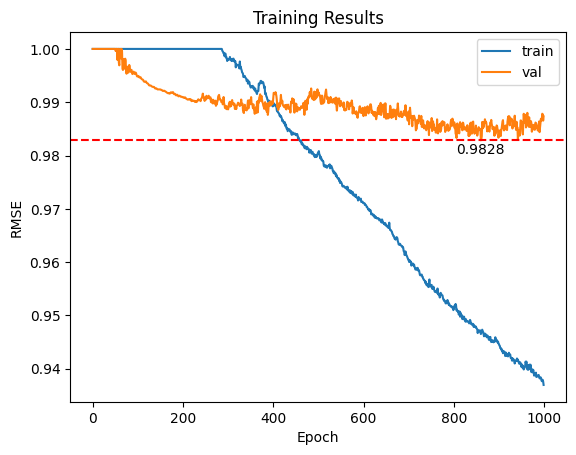

Testing ACT_FN=ELU(alpha=1.0)
Epoch 100 - Best Val: 0.9962 at 88 - mv-avg: - Train: 1.5327 - Val: 1.3623
Epoch 200 - Best Val: 0.9944 at 200 - mv-avg: - Train: 1.0419 - Val: 0.9961
Epoch 300 - Best Val: 0.9892 at 296 - mv-avg: - Train: 1.0266 - Val: 0.9919
Epoch 400 - Best Val: 0.9858 at 401 - mv-avg: - Train: 1.0148 - Val: 0.9874
Epoch 500 - Best Val: 0.9828 at 501 - mv-avg: - Train: 1.0051 - Val: 0.9845
Epoch 600 - Best Val: 0.9810 at 574 - mv-avg: - Train: 0.9970 - Val: 0.9822
Epoch 700 - Best Val: 0.9808 at 691 - mv-avg: - Train: 0.9913 - Val: 0.9814
Epoch 800 - Best Val: 0.9806 at 720 - mv-avg: - Train: 0.9874 - Val: 0.9813
Epoch 900 - Best Val: 0.9806 at 720 - mv-avg: - Train: 0.9847 - Val: 0.9814
Best val loss: 0.9806 at epoch 720


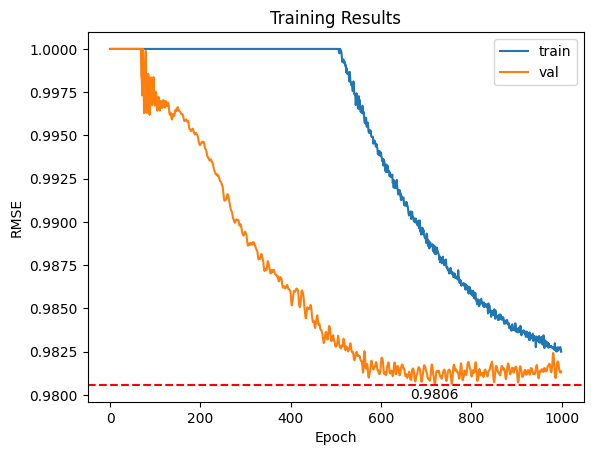

Testing ACT_FN=Sigmoid()
Epoch 100 - Best Val: 0.9898 at 101 - mv-avg: - Train: 1.1185 - Val: 1.0488
Epoch 200 - Best Val: 0.9882 at 186 - mv-avg: - Train: 1.0219 - Val: 0.9892
Epoch 300 - Best Val: 0.9880 at 299 - mv-avg: - Train: 1.0105 - Val: 0.9889
Epoch 400 - Best Val: 0.9880 at 299 - mv-avg: - Train: 1.0042 - Val: 0.9899
Epoch 500 - Best Val: 0.9880 at 299 - mv-avg: - Train: 1.0035 - Val: 0.9928
Epoch 600 - Best Val: 0.9880 at 299 - mv-avg: - Train: 1.0039 - Val: 0.9949
Epoch 700 - Best Val: 0.9880 at 299 - mv-avg: - Train: 1.0034 - Val: 0.9952
Epoch 800 - Best Val: 0.9880 at 299 - mv-avg: - Train: 1.0033 - Val: 0.9952
Epoch 900 - Best Val: 0.9880 at 299 - mv-avg: - Train: 1.0033 - Val: 0.9953
Best val loss: 0.9880 at epoch 299


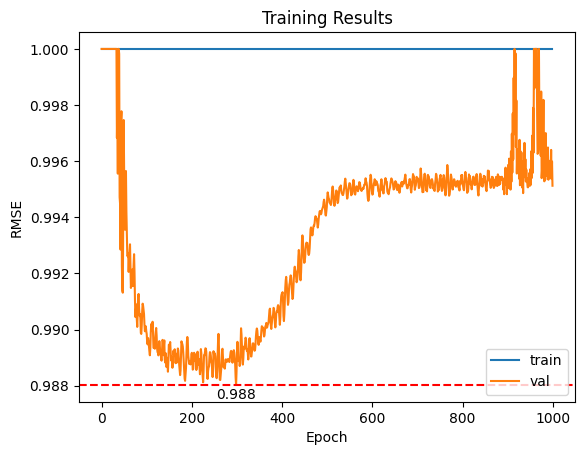

Testing ACT_FN=Tanh()
Epoch 100 - Best Val: 0.9927 at 100 - mv-avg: - Train: 1.3235 - Val: 1.2258
Epoch 200 - Best Val: 0.9899 at 201 - mv-avg: - Train: 1.0244 - Val: 0.9916
Epoch 300 - Best Val: 0.9889 at 278 - mv-avg: - Train: 1.0097 - Val: 0.9893
Epoch 400 - Best Val: 0.9886 at 365 - mv-avg: - Train: 1.0020 - Val: 0.9891
Epoch 500 - Best Val: 0.9886 at 365 - mv-avg: - Train: 0.9968 - Val: 0.9892
Epoch 600 - Best Val: 0.9886 at 365 - mv-avg: - Train: 0.9931 - Val: 0.9893
Epoch 700 - Best Val: 0.9886 at 365 - mv-avg: - Train: 0.9908 - Val: 0.9894
Epoch 800 - Best Val: 0.9886 at 365 - mv-avg: - Train: 0.9895 - Val: 0.9895
Epoch 900 - Best Val: 0.9886 at 365 - mv-avg: - Train: 0.9890 - Val: 0.9900
Best val loss: 0.9886 at epoch 365


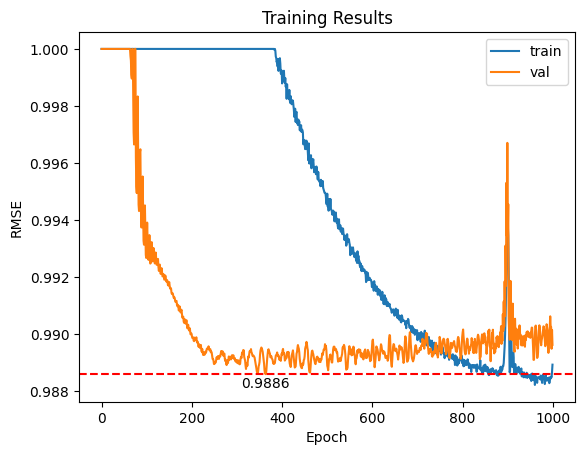

Testing ACT_FN=Softplus(beta=1, threshold=20)
Epoch 100 - Best Val: 0.9944 at 98 - mv-avg: - Train: 1.3108 - Val: 1.1768
Epoch 200 - Best Val: 0.9935 at 161 - mv-avg: - Train: 1.0258 - Val: 0.9941
Epoch 300 - Best Val: 0.9935 at 228 - mv-avg: - Train: 1.0149 - Val: 0.9939
Epoch 400 - Best Val: 0.9935 at 228 - mv-avg: - Train: 1.0097 - Val: 0.9945
Epoch 500 - Best Val: 0.9935 at 228 - mv-avg: - Train: 1.0069 - Val: 0.9951
Epoch 600 - Best Val: 0.9935 at 228 - mv-avg: - Train: 1.0054 - Val: 0.9957
Epoch 700 - Best Val: 0.9935 at 228 - mv-avg: - Train: 1.0048 - Val: 0.9960
Epoch 800 - Best Val: 0.9935 at 228 - mv-avg: - Train: 1.0044 - Val: 0.9961
Epoch 900 - Best Val: 0.9935 at 228 - mv-avg: - Train: 1.0047 - Val: 0.9965
Best val loss: 0.9935 at epoch 228


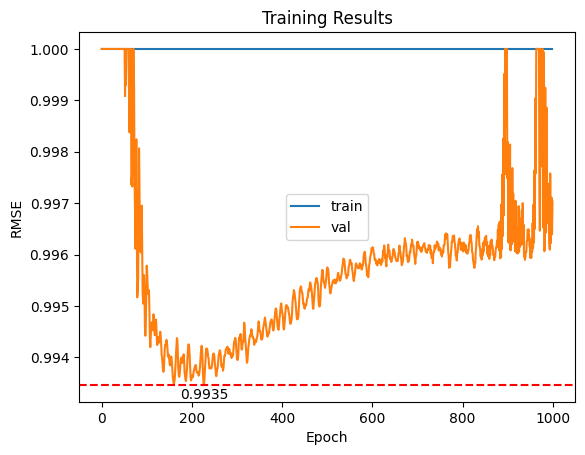

Testing ACT_FN=Softsign()
Epoch 100 - Best Val: 0.9923 at 97 - mv-avg: - Train: 1.2286 - Val: 1.1402
Epoch 200 - Best Val: 0.9865 at 201 - mv-avg: - Train: 1.0184 - Val: 0.9900
Epoch 300 - Best Val: 0.9816 at 292 - mv-avg: - Train: 1.0030 - Val: 0.9838
Epoch 400 - Best Val: 0.9815 at 399 - mv-avg: - Train: 0.9935 - Val: 0.9824
Epoch 500 - Best Val: 0.9815 at 399 - mv-avg: - Train: 0.9882 - Val: 0.9827
Epoch 600 - Best Val: 0.9815 at 399 - mv-avg: - Train: 0.9853 - Val: 0.9836
Epoch 700 - Best Val: 0.9815 at 399 - mv-avg: - Train: 0.9839 - Val: 0.9842
Epoch 800 - Best Val: 0.9815 at 399 - mv-avg: - Train: 0.9833 - Val: 0.9847
Epoch 900 - Best Val: 0.9815 at 399 - mv-avg: - Train: 0.9830 - Val: 0.9850
Best val loss: 0.9815 at epoch 399


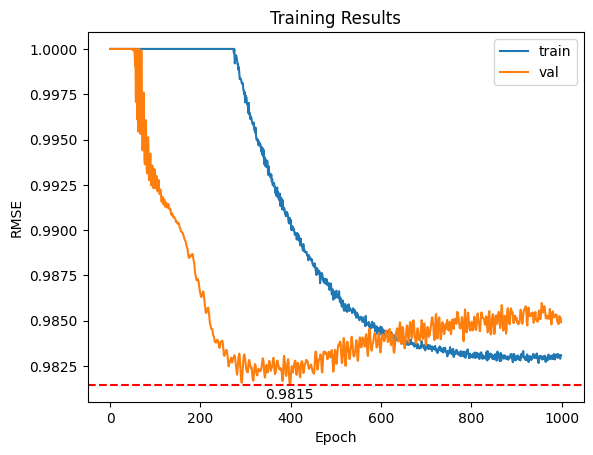

Testing ACT_FN=SELU()
Epoch 100 - Best Val: 0.9932 at 90 - mv-avg: - Train: 1.8526 - Val: 1.6481
Epoch 200 - Best Val: 0.9932 at 90 - mv-avg: - Train: 1.0399 - Val: 0.9936
Epoch 300 - Best Val: 0.9932 at 90 - mv-avg: - Train: 1.0301 - Val: 0.9937
Epoch 400 - Best Val: 0.9930 at 354 - mv-avg: - Train: 1.0225 - Val: 0.9935
Epoch 500 - Best Val: 0.9927 at 493 - mv-avg: - Train: 1.0164 - Val: 0.9932
Epoch 600 - Best Val: 0.9926 at 556 - mv-avg: - Train: 1.0109 - Val: 0.9929
Epoch 700 - Best Val: 0.9921 at 701 - mv-avg: - Train: 1.0061 - Val: 0.9926
Epoch 800 - Best Val: 0.9911 at 797 - mv-avg: - Train: 1.0016 - Val: 0.9918
Epoch 900 - Best Val: 0.9901 at 888 - mv-avg: - Train: 0.9978 - Val: 0.9909
Best val loss: 0.9898 at epoch 949


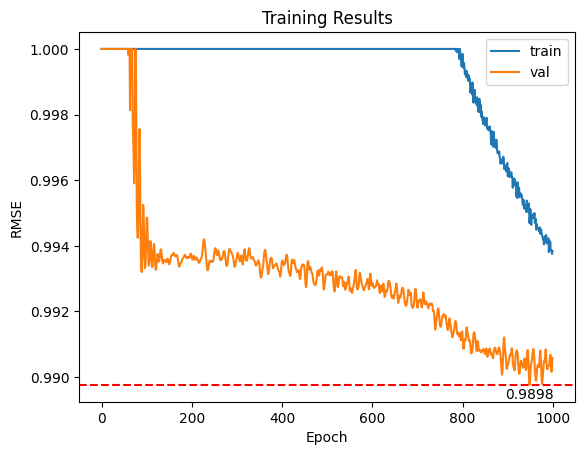

Testing ACT_FN=CELU(alpha=1.0)
Epoch 100 - Best Val: 0.9925 at 97 - mv-avg: - Train: 1.3793 - Val: 1.2206
Epoch 200 - Best Val: 0.9891 at 201 - mv-avg: - Train: 1.0271 - Val: 0.9914
Epoch 300 - Best Val: 0.9865 at 299 - mv-avg: - Train: 1.0148 - Val: 0.9878
Epoch 400 - Best Val: 0.9849 at 399 - mv-avg: - Train: 1.0049 - Val: 0.9859
Epoch 500 - Best Val: 0.9840 at 500 - mv-avg: - Train: 0.9970 - Val: 0.9847
Epoch 600 - Best Val: 0.9832 at 551 - mv-avg: - Train: 0.9913 - Val: 0.9839
Epoch 700 - Best Val: 0.9830 at 691 - mv-avg: - Train: 0.9874 - Val: 0.9836
Epoch 800 - Best Val: 0.9828 at 742 - mv-avg: - Train: 0.9850 - Val: 0.9834
Epoch 900 - Best Val: 0.9827 at 849 - mv-avg: - Train: 0.9836 - Val: 0.9832
Best val loss: 0.9825 at epoch 977


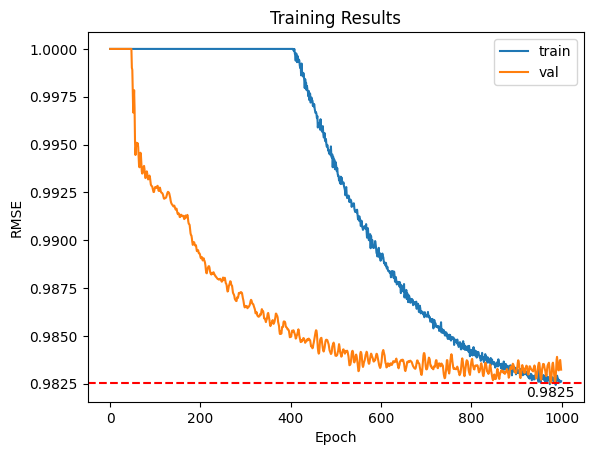

In [17]:

# Test varying ACT_FN
for value in activation_functions:
    model = LightGCNPlus(A_tilde, value, K, L, INIT_EMBS_STD, DROPOUT, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    loss_fn = nn.MSELoss()
    print(f"Testing ACT_FN={value}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((INIT_EMBS_STD, LR, WEIGHT_DECAY, DROPOUT, value))

Testing K=26
Epoch 100 - Best Val: 0.9893 at 97 - mv-avg: - Train: 1.3966 - Val: 1.2806
Epoch 200 - Best Val: 0.9866 at 201 - mv-avg: - Train: 1.0278 - Val: 0.9883
Epoch 300 - Best Val: 0.9835 at 301 - mv-avg: - Train: 1.0100 - Val: 0.9850
Epoch 400 - Best Val: 0.9816 at 382 - mv-avg: - Train: 0.9960 - Val: 0.9825
Epoch 500 - Best Val: 0.9816 at 382 - mv-avg: - Train: 0.9864 - Val: 0.9821
Epoch 600 - Best Val: 0.9811 at 561 - mv-avg: - Train: 0.9785 - Val: 0.9820
Epoch 700 - Best Val: 0.9811 at 561 - mv-avg: - Train: 0.9718 - Val: 0.9823
Epoch 800 - Best Val: 0.9811 at 561 - mv-avg: - Train: 0.9665 - Val: 0.9829
Epoch 900 - Best Val: 0.9811 at 561 - mv-avg: - Train: 0.9623 - Val: 0.9834
Epoch 1000 - Best Val: 0.9811 at 561 - mv-avg: - Train: 0.9594 - Val: 0.9834
Epoch 1100 - Best Val: 0.9811 at 561 - mv-avg: - Train: 0.9576 - Val: 0.9831
Epoch 1200 - Best Val: 0.9811 at 561 - mv-avg: - Train: 0.9564 - Val: 0.9831
Epoch 1300 - Best Val: 0.9811 at 561 - mv-avg: - Train: 0.9557 - Val: 0.9

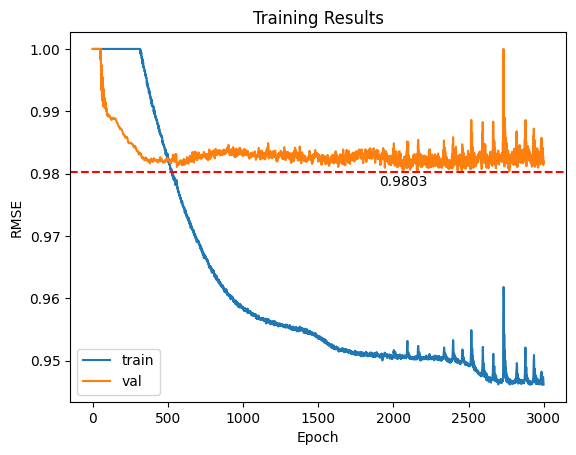

Testing K=28
Epoch 100 - Best Val: 0.9894 at 92 - mv-avg: - Train: 1.4833 - Val: 1.3402
Epoch 200 - Best Val: 0.9871 at 192 - mv-avg: - Train: 1.0280 - Val: 0.9887
Epoch 300 - Best Val: 0.9811 at 297 - mv-avg: - Train: 1.0074 - Val: 0.9851
Epoch 400 - Best Val: 0.9792 at 380 - mv-avg: - Train: 0.9912 - Val: 0.9802
Epoch 500 - Best Val: 0.9785 at 486 - mv-avg: - Train: 0.9821 - Val: 0.9792
Epoch 600 - Best Val: 0.9784 at 553 - mv-avg: - Train: 0.9766 - Val: 0.9790
Epoch 700 - Best Val: 0.9780 at 613 - mv-avg: - Train: 0.9730 - Val: 0.9790
Epoch 800 - Best Val: 0.9780 at 613 - mv-avg: - Train: 0.9702 - Val: 0.9788
Epoch 900 - Best Val: 0.9777 at 849 - mv-avg: - Train: 0.9672 - Val: 0.9786
Epoch 1000 - Best Val: 0.9777 at 849 - mv-avg: - Train: 0.9651 - Val: 0.9787
Epoch 1100 - Best Val: 0.9776 at 1028 - mv-avg: - Train: 0.9639 - Val: 0.9788
Epoch 1200 - Best Val: 0.9776 at 1028 - mv-avg: - Train: 0.9633 - Val: 0.9791
Epoch 1300 - Best Val: 0.9776 at 1028 - mv-avg: - Train: 0.9630 - Val: 

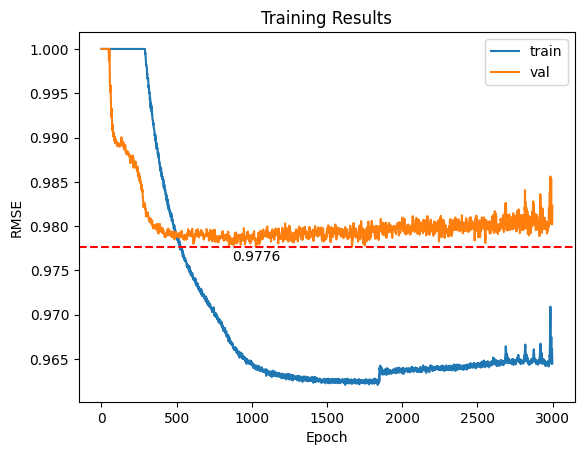

Testing K=30
Epoch 100 - Best Val: 0.9957 at 98 - mv-avg: - Train: 1.5711 - Val: 1.4005
Epoch 200 - Best Val: 0.9871 at 194 - mv-avg: - Train: 1.0466 - Val: 0.9907
Epoch 300 - Best Val: 0.9854 at 300 - mv-avg: - Train: 1.0224 - Val: 0.9864
Epoch 400 - Best Val: 0.9840 at 395 - mv-avg: - Train: 1.0075 - Val: 0.9856
Epoch 500 - Best Val: 0.9840 at 395 - mv-avg: - Train: 0.9962 - Val: 0.9853
Epoch 600 - Best Val: 0.9833 at 577 - mv-avg: - Train: 0.9884 - Val: 0.9849
Epoch 700 - Best Val: 0.9833 at 577 - mv-avg: - Train: 0.9818 - Val: 0.9854
Epoch 800 - Best Val: 0.9833 at 577 - mv-avg: - Train: 0.9759 - Val: 0.9851
Epoch 900 - Best Val: 0.9833 at 577 - mv-avg: - Train: 0.9720 - Val: 0.9850
Epoch 1000 - Best Val: 0.9830 at 988 - mv-avg: - Train: 0.9689 - Val: 0.9845
Epoch 1100 - Best Val: 0.9822 at 1098 - mv-avg: - Train: 0.9662 - Val: 0.9832
Epoch 1200 - Best Val: 0.9812 at 1195 - mv-avg: - Train: 0.9646 - Val: 0.9828
Epoch 1300 - Best Val: 0.9812 at 1195 - mv-avg: - Train: 0.9634 - Val: 

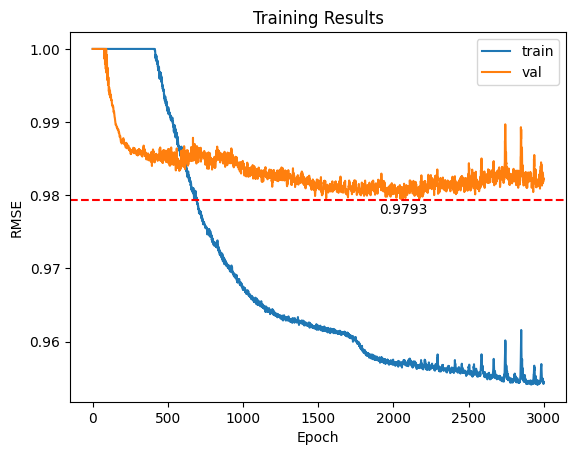

Testing K=32
Epoch 100 - Best Val: 0.9958 at 97 - mv-avg: - Train: 1.5585 - Val: 1.3796
Epoch 200 - Best Val: 0.9916 at 197 - mv-avg: - Train: 1.0658 - Val: 0.9946
Epoch 300 - Best Val: 0.9893 at 288 - mv-avg: - Train: 1.0225 - Val: 0.9906
Epoch 400 - Best Val: 0.9886 at 376 - mv-avg: - Train: 0.9997 - Val: 0.9892
Epoch 500 - Best Val: 0.9863 at 498 - mv-avg: - Train: 0.9865 - Val: 0.9877
Epoch 600 - Best Val: 0.9845 at 595 - mv-avg: - Train: 0.9769 - Val: 0.9856
Epoch 700 - Best Val: 0.9830 at 675 - mv-avg: - Train: 0.9710 - Val: 0.9842
Epoch 800 - Best Val: 0.9830 at 675 - mv-avg: - Train: 0.9682 - Val: 0.9839
Epoch 900 - Best Val: 0.9826 at 877 - mv-avg: - Train: 0.9669 - Val: 0.9835
Epoch 1000 - Best Val: 0.9826 at 998 - mv-avg: - Train: 0.9663 - Val: 0.9834
Epoch 1100 - Best Val: 0.9822 at 1073 - mv-avg: - Train: 0.9660 - Val: 0.9832
Epoch 1200 - Best Val: 0.9822 at 1073 - mv-avg: - Train: 0.9660 - Val: 0.9834
Epoch 1300 - Best Val: 0.9822 at 1073 - mv-avg: - Train: 0.9661 - Val: 

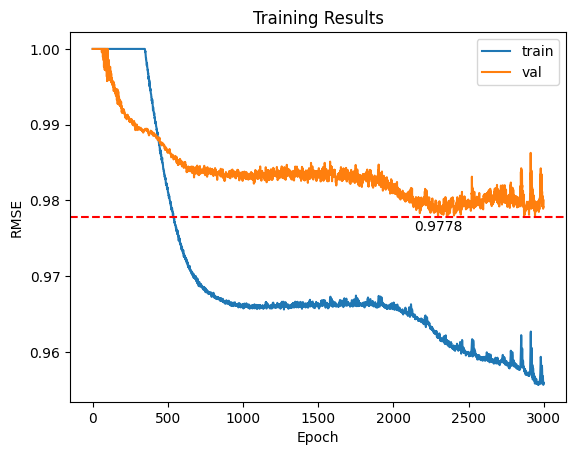

Testing K=34


OutOfMemoryError: CUDA out of memory. Tried to allocate 908.00 MiB. GPU 0 has a total capacty of 8.00 GiB of which 0 bytes is free. Of the allocated memory 6.06 GiB is allocated by PyTorch, and 676.59 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [18]:
# Test varying Ks

# Initial hyperparameters
INIT_EMBS_STD = 0.075
LR = 0.1
WEIGHT_DECAY = 0.00005
DROPOUT = 0.5
ACT_FN = nn.GELU()

# Train loop hyperparameters
EPOCHS = 3000
STOP_THRESHOLD=1e-09
L=5
PROJECTIONS = (6,)

K=[26,28,30,32,34]

for k in K:
    model = LightGCNPlus(A_tilde, ACT_FN, k, L, INIT_EMBS_STD, DROPOUT, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    loss_fn = nn.MSELoss()
    print(f"Testing K={k}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((INIT_EMBS_STD, LR, WEIGHT_DECAY, DROPOUT, value))

In [ ]:
# Report top k best hyperparameter combos
TOP_K = 10
best_ids = np.argsort(results["min_val_losses"])[:TOP_K]

for i in best_ids:
    print(f"Best hyperparameters: {results['params'][i]}")
    print(f"Best val loss: {results['min_val_losses'][i]}")

min: 0.04022169
max: 5.699665
mean: 3.8560307


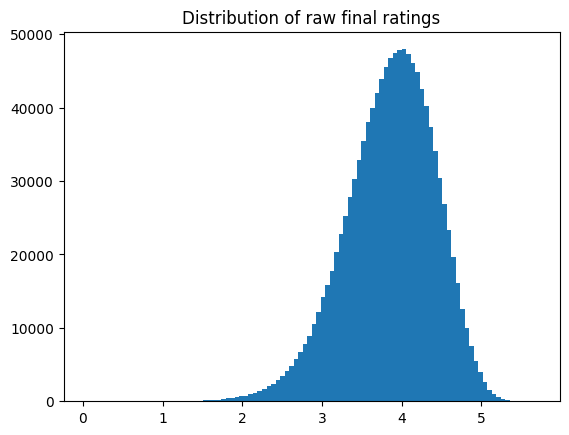

min: 1.0
max: 5.0
mean: 3.8553733392107703
count_over_5: 0
count_under_1: 0

min: 1.0
max: 5.0
mean: 3.8553733392107703


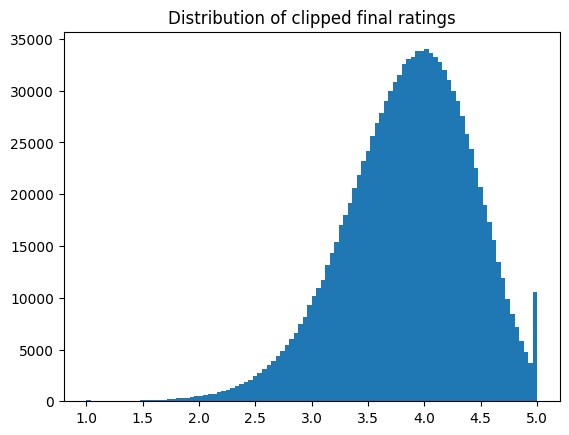

In [7]:
from postprocess import load_submission_users_items, report_submission_results, create_submission_matrix, report_clip_data, to_submission_format, load_means_stds, load_best_val_model

model_class = LightGCNPlus
ID = str(28) + "_" + str(5) + "_" + str((6,))

sub_users, sub_items = load_submission_users_items()
model = load_best_val_model(model_class, ID)

# Get predictions from model for submission users and items
raw_pred_ratings = model.get_ratings(sub_users, sub_items).detach().cpu().numpy()
raw_submission_matrix = create_submission_matrix(raw_pred_ratings, sub_users, sub_items)
pred_ratings = raw_submission_matrix[sub_users, sub_items]
pred_ratings = np.clip(pred_ratings, 1, 5)

# Report results
report_submission_results(raw_pred_ratings, "raw")
report_clip_data(pred_ratings)
report_submission_results(pred_ratings, "clipped")

# Generate submission file
# submission = to_submission_format(sub_users, sub_items, pred_ratings)
# submission.to_csv('../data/submission_data/submission.csv', index=False)